In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd       # For data manipulation and analysis
import numpy as np        # For numerical computations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For statistical data visualization


**Loading the Original Data set**

In [ ]:

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/HCC - Research/ Data set/HCC.csv')
data.head(5)




,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,"7,1","0,7",1,"3,5","0,5","52,5",37,856,1
1,0,0,0,0,0,0,1,1,0,1,...,120,7,"0,58",1,"1,8","0,85",32,10,18,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,"2,1",5,13,"0,1",28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,"8,1","1,11",2,"15,7","0,2",131,78,1316,0
4,1,1,1,1,0,1,0,1,0,1,...,109,"6,9","1,8",1,9,"0,1",59,15,22,1


In [ ]:
# Create DataFrame
data = pd.DataFrame(data)

# List of columns where commas should be replaced and converted to float
columns_to_modify = ['Age', 'Grams_day', 'Packs_year', 'INR','AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin',	'Total_Bil',
                     'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

# Replace commas with dots and convert to float for specified columns
data[columns_to_modify] = data[columns_to_modify].replace({',': '.'}, regex=True).astype(float)

print(data)

     Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0         1         0        1      0      0      0      0          1   
1         0         0        0      0      0      0      1          1   
2         1         0        1      1      0      1      0          1   
3         1         1        1      0      0      0      0          1   
4         1         1        1      1      0      1      0          1   
..      ...       ...      ...    ...    ...    ...    ...        ...   
199       0         0        0      0      0      0      1          1   
200       0         1        1      0      0      0      0          1   
201       1         1        1      0      0      0      0          1   
202       1         1        1      0      0      0      0          1   
203       0         1        0      0      0      0      0          0   

     Endemic  Smoking  ...    ALP   TP  Creatinine  Nodule  Major_Dim  \
0          0        1  ...  150.0  7.1        0.70

**Data Cleaning**

In [ ]:
# Create DataFrame
dfn = pd.DataFrame(data)

# List of columns where commas should be replaced and converted to float
columns_to_modify = ['Age', 'Grams_day', 'Packs_year', 'INR','AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin',	'Total_Bil',
                     'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

# Replace commas with dots and convert to float for specified columns
dfn[columns_to_modify] = dfn[columns_to_modify].replace({',': '.'}, regex=True).astype(float)

print(dfn)

     Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0         1         0        1      0      0      0      0          1   
1         0         0        0      0      0      0      1          1   
2         1         0        1      1      0      1      0          1   
3         1         1        1      0      0      0      0          1   
4         1         1        1      1      0      1      0          1   
..      ...       ...      ...    ...    ...    ...    ...        ...   
199       0         0        0      0      0      0      1          1   
200       0         1        1      0      0      0      0          1   
201       1         1        1      0      0      0      0          1   
202       1         1        1      0      0      0      0          1   
203       0         1        0      0      0      0      0          0   

     Endemic  Smoking  ...    ALP   TP  Creatinine  Nodule  Major_Dim  \
0          0        1  ...  150.0  7.1        0.70

In [ ]:
from google.colab import files

In [ ]:

# Convert 'Packs_year' to positive integers by rounding and converting to int
dfn['Packs_year'] = dfn['Packs_year'].round().abs().astype(int)

# Save the modified DataFrame as a CSV file
dfn.to_csv('modified_dataset_new.csv', index=False)

# Download the file
#files.download('modified_dataset_new.csv')



In [ ]:
dfn.head(5)
# Get the count of each gender
gender_counts = dfn['Gender'].value_counts()

# Get the count of each gender
sym_counts = dfn['Symptoms'].value_counts()

# Get the count of each gender
sur_counts = dfn['Class'].value_counts()

# Display the counts
print(gender_counts)
print(sym_counts)
print(sur_counts)

Gender
1    162
0     42
Name: count, dtype: int64
Symptoms
1    141
0     63
Name: count, dtype: int64
Class
1    102
0    102
Name: count, dtype: int64


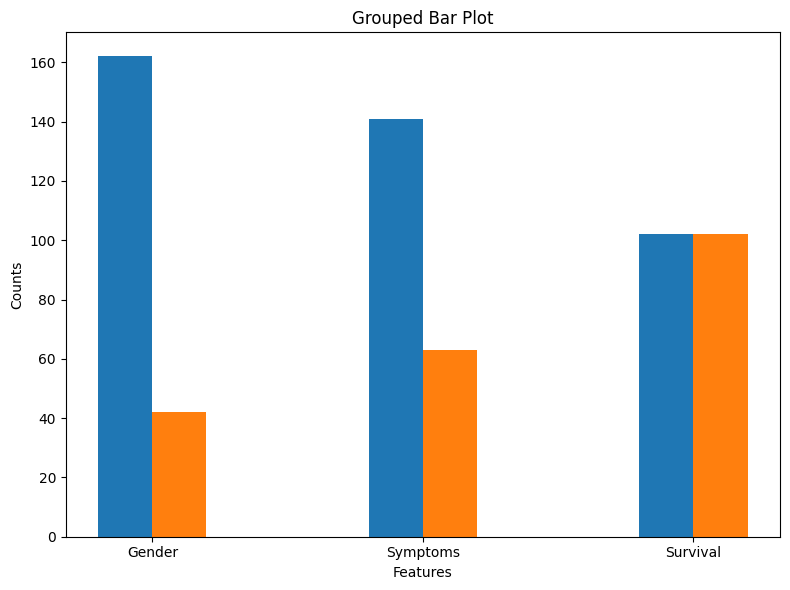

In [ ]:
# Get the counts for each feature
gender_counts = dfn['Gender'].value_counts()
sym_counts = dfn['Symptoms'].value_counts()
sur_counts = dfn['Class'].value_counts()

# Combine the counts into a DataFrame
counts = pd.DataFrame({
    'Gender': gender_counts,
    'Symptoms': sym_counts,
    'Survival': sur_counts
}).fillna(0)

# Transpose for easier plotting
counts = counts.T

# Plotting
features = counts.index  # Features for x-axis
categories = counts.columns  # Unique categories
x = np.arange(len(features))  # Number of features
bar_width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))

# Create grouped bars
for i, category in enumerate(categories):
    ax.bar(
        x + i * bar_width,
        counts[category],
        width=bar_width,
        label=category
    )

# Customize the plot
ax.set_xlabel('Features')
ax.set_ylabel('Counts')
ax.set_title('Grouped Bar Plot')
ax.set_xticks(x + bar_width * (len(categories) - 1) / 2)
ax.set_xticklabels(features)
plt.tight_layout()
plt.show()

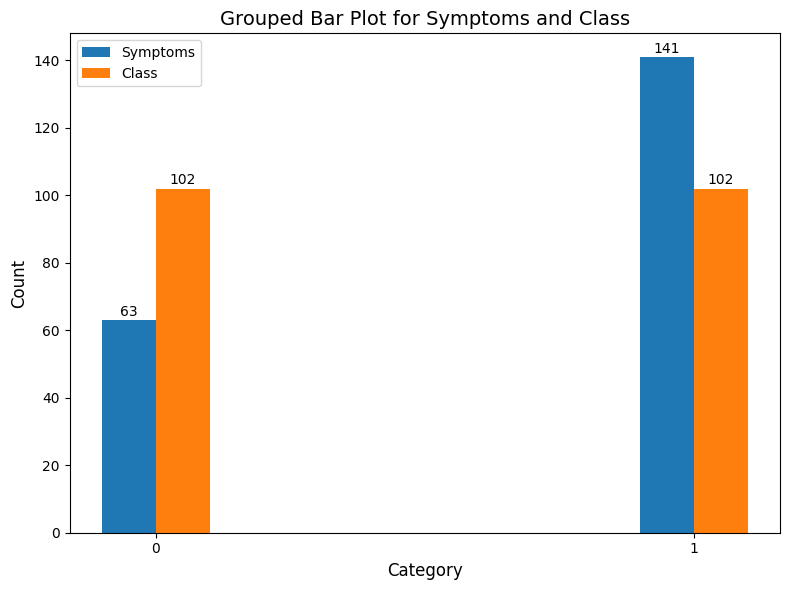

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Category': [0, 1],
    'Symptoms': [63, 141],
    'Class': [102, 102]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
x = np.arange(len(df['Category']))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, df['Symptoms'], width, label='Symptoms')
bar2 = ax.bar(x + width/2, df['Class'], width, label='Class')

# Add labels, title, and legend
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Grouped Bar Plot for Symptoms and Class', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df['Category'], fontsize=10)
ax.legend()

# Display counts above bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


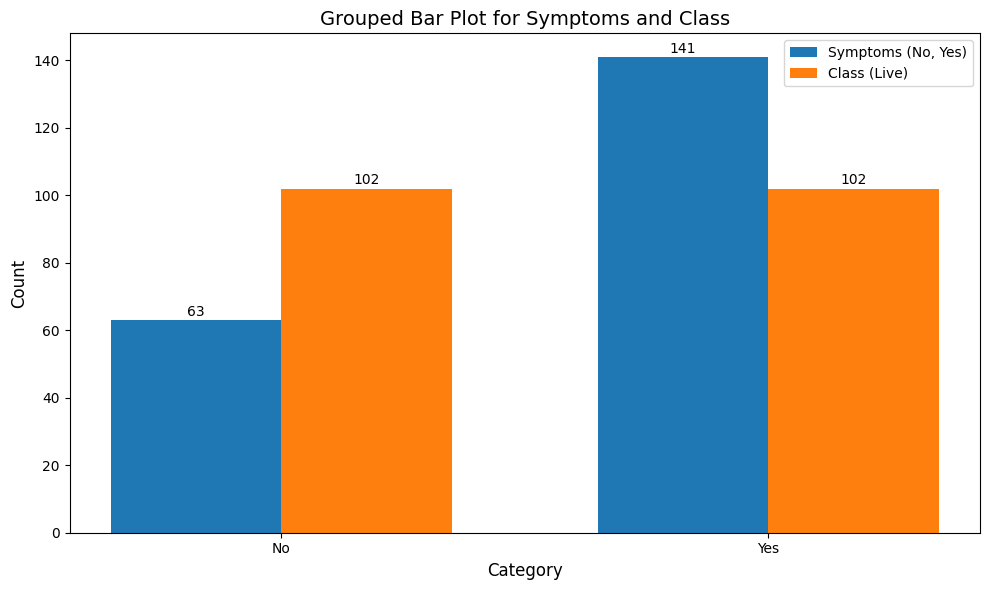

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Category': ['No', 'Yes'],
    'Symptoms': [63, 141],
    'Class_Live': [102, 102],  # This represents the 'Live' category of Class
    'Class_Die': [0, 0]        # This represents the 'Die' category of Class (assuming the second category)
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
x = np.arange(len(df['Category']))  # the label locations for Symptoms categories
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, df['Symptoms'], width, label='Symptoms (No, Yes)')
bar2 = ax.bar(x + width/2, df['Class_Live'], width, label='Class (Live)')

# Add labels, title, and legend
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Grouped Bar Plot for Symptoms and Class', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df['Category'], fontsize=10)
ax.legend()

# Display counts above bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [ ]:
# Option 1: Assign back to df
# Remove the Radilogical Findings Features
dfn = dfn.drop(['Hallmark', 'Nodule', 'Varices','Spleno','Ascites','Metastasis','PVT','PHT','Major_Dim','PS','Endemic'], axis=1)


In [ ]:
num_columns = dfn.shape[1]
print(num_columns)


# Save the modified DataFrame as a CSV file
dfn.to_csv('modified_dataset_new.csv', index=False)

# Download the file
#files.download('modified_dataset_new.csv')

39


In [ ]:
from google.colab import files

# Save the modified DataFrame as a CSV file
dfn.to_csv('dataset_new.csv', index=False)

# Download the file
#files.download('dataset_new.csv')

In [ ]:
X_Sym = dfn.drop(['Symptoms','Class'], axis = 1)
Y_Sym = dfn['Symptoms']

X_Sym.head(5)

,Gender,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Smoking,Diabetes,Obesity,...,ALT,AST,GGT,ALP,TP,Creatinine,Dir_Bil,Iron,Sat,Ferritin
0,1,1,0,0,0,0,1,1,1,0,...,34.0,41.0,183.0,150.0,7.1,0.70,0.50,52.5,37.0,856.0
1,0,0,0,0,0,1,1,1,1,0,...,11.0,28.0,77.0,120.0,7.0,0.58,0.85,32.0,10.0,18.0
2,1,1,1,0,1,0,1,1,0,0,...,58.0,68.0,202.0,109.0,7.0,2.10,0.10,28.0,6.0,16.0
3,1,1,0,0,0,0,1,1,1,0,...,16.0,64.0,94.0,174.0,8.1,1.11,0.20,131.0,78.0,1316.0
4,1,1,1,0,1,0,1,1,0,0,...,147.0,306.0,173.0,109.0,6.9,1.80,0.10,59.0,15.0,22.0


In [ ]:
num_Sym = X_Sym.shape[1]
print(num_Sym)
print(f'Number of Features: {num_Sym:.2f}')

columns_Sym = list(X_Sym.columns)
print(columns_Sym)



37
Number of Features: 37.00
['Gender', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Age', 'Grams_day', 'Packs_year', 'Encephalopathy', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']


**Normalize the Numerical Data**

In [ ]:
# Standardize the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_convert = ['Age', 'Grams_day', 'Packs_year', 'INR','AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin',	'Total_Bil',
                     'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine','Dir_Bil', 'Iron', 'Sat', 'Ferritin']
X_Sym[columns_to_convert] = scaler.fit_transform(X_Sym[columns_to_convert])
print(X_Sym)


     Gender  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  Smoking  \
0         1        1      0      0      0      0          1        1   
1         0        0      0      0      0      1          1        1   
2         1        1      1      0      1      0          1        1   
3         1        1      0      0      0      0          1        1   
4         1        1      1      0      1      0          1        1   
..      ...      ...    ...    ...    ...    ...        ...      ...   
199       0        0      0      0      0      1          1        0   
200       0        1      0      0      0      0          1        0   
201       1        1      0      0      0      0          1        0   
202       1        1      0      0      0      0          1        0   
203       0        0      0      0      0      0          0        0   

     Diabetes  Obesity  ...       ALT       AST       GGT       ALP        TP  \
0           1        0  ... -0.612635 -0.675653 -0.352

In [ ]:
# Assuming your DataFrame is named 'data'
number_of_columns = X_Sym.shape[1]
print("Number of columns:", number_of_columns)

Number of columns: 37


**Factor Analysis for Mixed Data (FAMD) - Symptoms Prediction Model**

In [ ]:
# Step 2: Apply FAMD using the prince package
!pip install prince
import pandas as pd
import prince



famd = prince.FAMD(
    n_components=number_of_columns,
    copy=True,
    n_iter= 1,
    check_input=True,
)

famd_Sym = famd.fit(X_Sym)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.3/417.3 kB 23.0 MB/s eta 0:00:00


In [ ]:
# Transform the data into new dimensions
transformed_data = famd_Sym.transform(X_Sym)

# Retrieve the eigenvalues (proportional variances)
eigenvalues = famd_Sym.eigenvalues_
# Calculate the percentage of variance explained by each dimension
explained_variance_ratio = famd_Sym.cumulative_percentage_of_variance_

# Display the transformed data and variance information
transformed_data, eigenvalues, explained_variance_ratio

# Eigenvectors
summary = famd_Sym.eigenvalues_summary

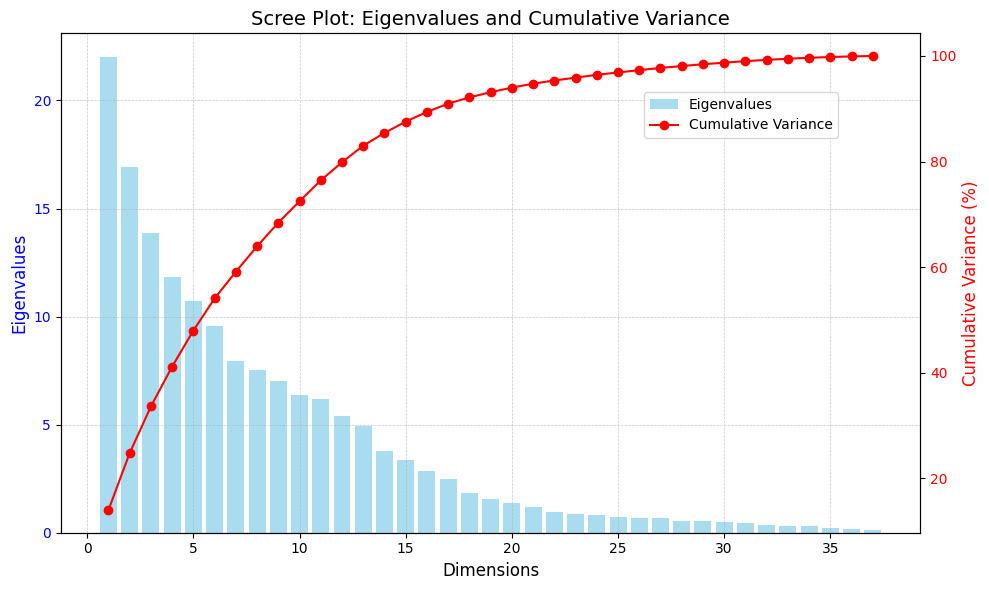

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume these variables are already computed
# eigenvalues = famd_Sym.eigenvalues_
# explained_variance_ratio = famd_Sym.cumulative_percentage_of_variance_

# Generate x-axis labels for dimensions
dimensions = np.arange(1, len(eigenvalues) + 1)

# Create the scree plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot eigenvalues as bars
ax1.bar(dimensions, eigenvalues, alpha=0.7, label='Eigenvalues', color='skyblue')
ax1.set_xlabel('Dimensions', fontsize=12)
ax1.set_ylabel('Eigenvalues', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot cumulative percentage of variance on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(dimensions, explained_variance_ratio, color='red', marker='o', label='Cumulative Variance')
ax2.set_ylabel('Cumulative Variance (%)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add grid, title, and legend
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('Scree Plot: Eigenvalues and Cumulative Variance', fontsize=14)

# Add legends for clarity
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.85))

# Show plot
plt.tight_layout()
plt.show()


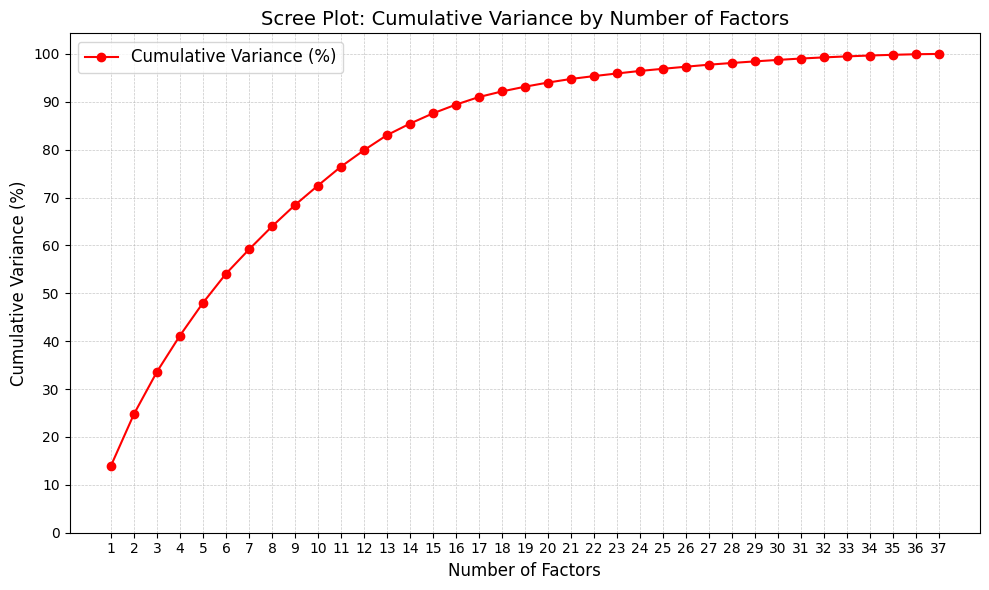

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume explained_variance_ratio is already computed as percentages
# explained_variance_ratio = famd_Sym.cumulative_percentage_of_variance_

# Generate x-axis labels for dimensions (number of factors)
dimensions = np.arange(1, len(explained_variance_ratio) + 1)

# Plot cumulative variance percentage
plt.figure(figsize=(10, 6))
plt.plot(dimensions, explained_variance_ratio, color='red', marker='o', linestyle='-', label='Cumulative Variance (%)')
plt.xlabel('Number of Factors', fontsize=12)
plt.ylabel('Cumulative Variance (%)', fontsize=12)
plt.title('Scree Plot: Cumulative Variance by Number of Factors', fontsize=14)
plt.xticks(dimensions)  # Ensure all factors are labeled
plt.yticks(np.arange(0, 110, 10))  # Y-axis in steps of 10%
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


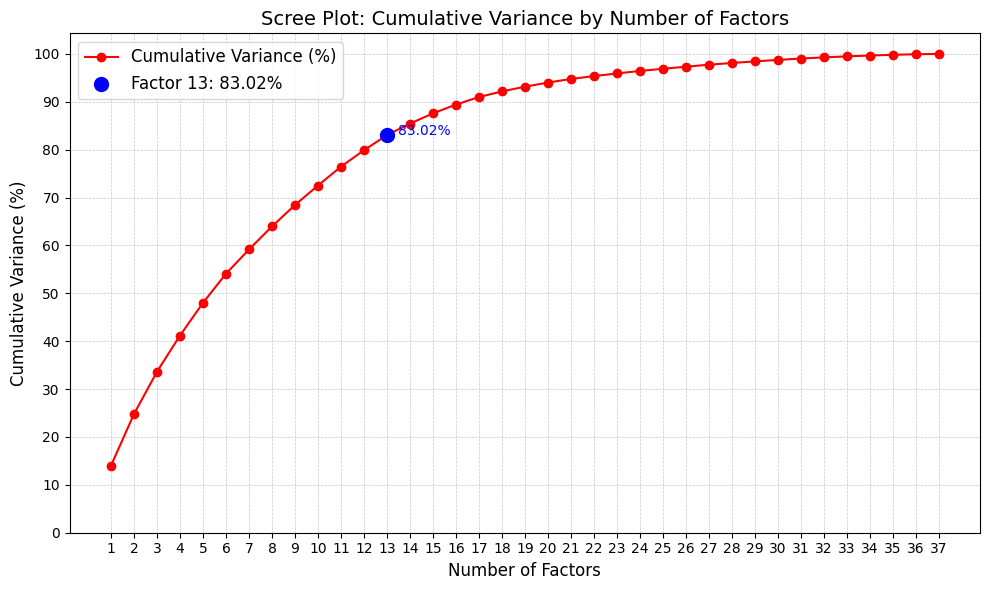

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume explained_variance_ratio is already computed as percentages
# explained_variance_ratio = famd_Sym.cumulative_percentage_of_variance_

# Generate x-axis labels for dimensions (number of factors)
dimensions = np.arange(1, len(explained_variance_ratio) + 1)

# Highlight the 13th factor
highlight_factor = 13
highlight_value = explained_variance_ratio[highlight_factor - 1]  # Cumulative percentage for factor 13

# Plot cumulative variance percentage
plt.figure(figsize=(10, 6))
plt.plot(dimensions, explained_variance_ratio, color='red', marker='o', linestyle='-', label='Cumulative Variance (%)')

# Highlight the 13th factor
plt.scatter(highlight_factor, highlight_value, color='blue', s=100, zorder=5, label=f'Factor {highlight_factor}: {highlight_value:.2f}%')
plt.text(
    highlight_factor + 0.5, highlight_value,  # Positioning slightly to the right of the point
    f'{highlight_value:.2f}%', fontsize=10, color='blue'
)

# Add labels, title, and grid
plt.xlabel('Number of Factors', fontsize=12)
plt.ylabel('Cumulative Variance (%)', fontsize=12)
plt.title('Scree Plot: Cumulative Variance by Number of Factors', fontsize=14)
plt.xticks(dimensions)  # Ensure all factors are labeled
plt.yticks(np.arange(0, 110, 10))  # Y-axis in steps of 10%
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


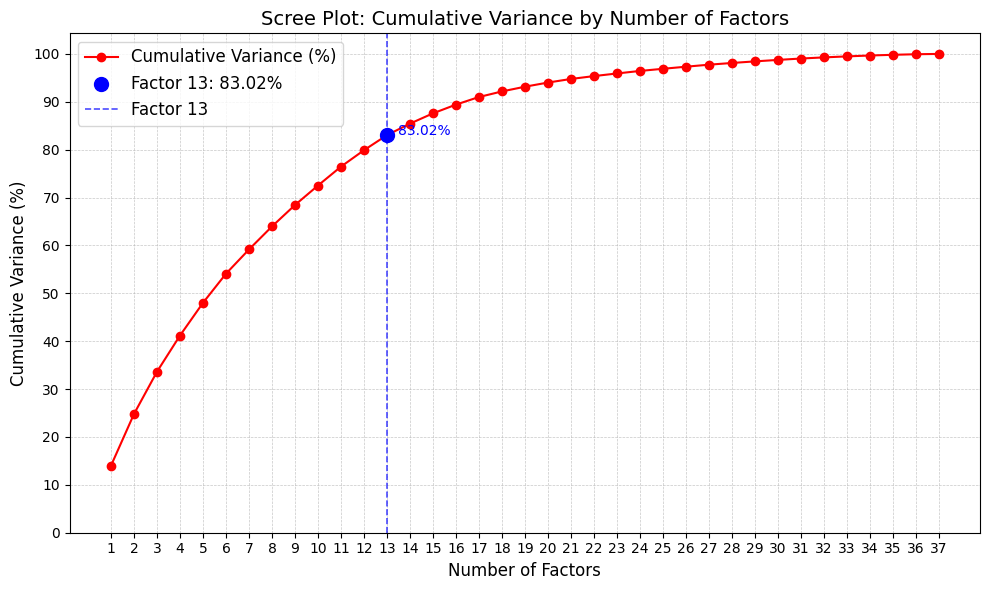

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume explained_variance_ratio is already computed as percentages
# explained_variance_ratio = famd_Sym.cumulative_percentage_of_variance_

# Generate x-axis labels for dimensions (number of factors)
dimensions = np.arange(1, len(explained_variance_ratio) + 1)

# Highlight the 13th factor
highlight_factor = 13
highlight_value = explained_variance_ratio[highlight_factor - 1]  # Cumulative percentage for factor 13

# Plot cumulative variance percentage
plt.figure(figsize=(10, 6))
plt.plot(dimensions, explained_variance_ratio, color='red', marker='o', linestyle='-', label='Cumulative Variance (%)')

# Highlight the 13th factor with a marker
plt.scatter(highlight_factor, highlight_value, color='blue', s=100, zorder=5, label=f'Factor {highlight_factor}: {highlight_value:.2f}%')

# Add a vertical dashed line for factor 13
plt.axvline(x=highlight_factor, color='blue', linestyle='--', linewidth=1.2, alpha=0.7, label=f'Factor {highlight_factor}')

# Annotate the value for factor 13
plt.text(
    highlight_factor + 0.5, highlight_value,  # Positioning slightly to the right of the point
    f'{highlight_value:.2f}%', fontsize=10, color='blue'
)

# Add labels, title, and grid
plt.xlabel('Number of Factors', fontsize=12)
plt.ylabel('Cumulative Variance (%)', fontsize=12)
plt.title('Scree Plot: Cumulative Variance by Number of Factors', fontsize=14)
plt.xticks(dimensions)  # Ensure all factors are labeled
plt.yticks(np.arange(0, 110, 10))  # Y-axis in steps of 10%
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# Print the transformed data and variance information
print("Transformed Data:")
print(transformed_data)


# Save the transformed data to a CSV file
transformed_data.to_csv('transformed_data.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('transformed_data.csv')

Transformed Data:
component        0          1         2         3         4         5   \
0         -1.065898  -6.542618 -1.419705 -0.965834 -4.068318  5.278266   
1         -2.451160   4.812422 -0.360698  3.722604 -0.985181  2.974370   
2          3.770097  -0.314168  5.800199  3.494283 -2.131295 -5.673620   
3         -2.510827  -3.320424  3.269786  1.981568 -1.187716 -1.049616   
4          4.205791  -0.558226  5.632160  4.010254 -1.807861 -5.536799   
..              ...        ...       ...       ...       ...       ...   
199       -2.458889   6.685601  0.209538  1.036533 -1.986677  4.355840   
200       -3.095499  -0.682784 -2.110600 -5.952230 -0.978515  3.786362   
201       -0.382041  -1.397414 -2.213670 -3.140439 -0.041040 -2.940574   
202       -4.747213  -2.955029  5.520338 -1.853808 -3.817269  2.207587   
203       -6.110824  10.841739  3.132092 -0.603397 -2.423202  0.322620   

component        6         7         8         9   ...        27        28  \
0         -2.79

In [ ]:
print("\nExplained Inertia (Proportional Variances):")
print(explained_variance_ratio)

#print(famd.column_contributions_)


Explained Inertia (Proportional Variances):
[14.01693425 24.80787387 33.63266339 41.17874002 48.00799707 54.08573689
 59.14893649 63.95298641 68.42682764 72.49564568 76.43868884 79.87066582
 83.01957394 85.42205092 87.5682457  89.39469644 90.98222431 92.14910508
 93.13606416 94.00232978 94.75336735 95.35342671 95.89982329 96.42807854
 96.87854133 97.31254782 97.73538852 98.09179465 98.42781651 98.7322553
 99.02134116 99.26188259 99.46937853 99.65491209 99.80110137 99.91886005
 99.98808991]


In [ ]:
print(eigenvalues)

[22.00658677 16.9417752  13.85491956 11.84734031 10.72193356  9.54205152
  7.94922338  7.54235837  7.02393073  6.38804431  6.19057776  5.38820386
  4.94378575  3.77188886  3.3695258   2.86752766  2.49241876  1.83200281
  1.54952576  1.36003703  1.17912898  0.94209319  0.85784263  0.82936074
  0.70722659  0.68139018  0.6638599   0.55955762  0.52755433  0.4779689
  0.4538648   0.37765004  0.32576862  0.29128769  0.22951717  0.18488114
  0.10869087]


In [ ]:
print(summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             22.007        14.02%                     14.02%
1             16.942        10.79%                     24.81%
2             13.855         8.82%                     33.63%
3             11.847         7.55%                     41.18%
4             10.722         6.83%                     48.01%
5              9.542         6.08%                     54.09%
6              7.949         5.06%                     59.15%
7              7.542         4.80%                     63.95%
8              7.024         4.47%                     68.43%
9              6.388         4.07%                     72.50%
10             6.191         3.94%                     76.44%
11             5.388         3.43%                     79.87%
12             4.944         3.15%                     83.02%
13             3.772         2.40%                     85.42%
14      

In [ ]:
import pandas as pd
# Get the loadings (contributions of variables to the components)
loadings = famd_Sym.column_coordinates_

# Print the loadings
print("Loadings:\n", loadings)

# Save the DataFrame to a CSV file
loadings.to_csv('famd_loadings_sym.csv', index=False)

from google.colab import files

# Download the CSV file
#files.download('famd_loadings_sym.csv')

Loadings:
 component             0         1         2         3         4         5   \
variable                                                                     
Age             0.061246  0.021225  0.166022  0.001117  0.000109  0.000608   
Grams_day       0.000835  0.376974  0.003125  0.000064  0.000005  0.042794   
Packs_year      0.000004  0.011483  0.017244  0.069725  0.012406  0.001135   
INR             0.016684  0.059945  0.005310  0.014566  0.006847  0.000225   
AFP             0.000080  0.007517  0.001037  0.001726  0.021483  0.022363   
Hemoglobin      0.000069  0.007883  0.009517  0.091026  0.004107  0.001771   
MCV             0.060483  0.052068  0.000172  0.001922  0.011886  0.000020   
Leucocytes      0.000259  0.007259  0.053886  0.014236  0.014604  0.016704   
Platelets       0.001201  0.042817  0.041674  0.004107  0.007781  0.098860   
Albumin         0.007874  0.022690  0.005111  0.072514  0.001333  0.009697   
Total_Bil       0.240098  0.000065  0.048089  0.02125

In [ ]:

# Assuming 'transformed_data' is your DataFrame with the transformed data
Sym_trans = transformed_data.iloc[:, :13]  # Slicing the first 14 columns

# Create a new DataFrame with the first 12 columns
Trans_Sym = Sym_trans.copy()

# Update the column names to Dim1, Dim2, ..., Dim12
new_column_names = [f'Dim{i+1}' for i in range(13)]
Trans_Sym.columns = new_column_names

# Print the new DataFrame with updated column names
print("New DataFrame with Updated Column Names:")
print(Trans_Sym)



# Save the transformed data to a CSV file
Trans_Sym.to_csv('Trans_Sym.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('Trans_Sym.csv')

New DataFrame with Updated Column Names:
         Dim1       Dim2      Dim3      Dim4      Dim5      Dim6      Dim7  \
0   -1.065898  -6.542618 -1.419705 -0.965834 -4.068318  5.278266 -2.790864   
1   -2.451160   4.812422 -0.360698  3.722604 -0.985181  2.974370 -2.460531   
2    3.770097  -0.314168  5.800199  3.494283 -2.131295 -5.673620  6.268657   
3   -2.510827  -3.320424  3.269786  1.981568 -1.187716 -1.049616 -1.967320   
4    4.205791  -0.558226  5.632160  4.010254 -1.807861 -5.536799  6.101441   
..        ...        ...       ...       ...       ...       ...       ...   
199 -2.458889   6.685601  0.209538  1.036533 -1.986677  4.355840  0.732187   
200 -3.095499  -0.682784 -2.110600 -5.952230 -0.978515  3.786362  5.086970   
201 -0.382041  -1.397414 -2.213670 -3.140439 -0.041040 -2.940574 -1.429139   
202 -4.747213  -2.955029  5.520338 -1.853808 -3.817269  2.207587  6.654400   
203 -6.110824  10.841739  3.132092 -0.603397 -2.423202  0.322620  2.478666   

         Dim8      Dim

In [ ]:
print(famd.cumulative_percentage_of_variance_)

[14.01693425 24.80787387 33.63266339 41.17874002 48.00799707 54.08573689
 59.14893649 63.95298641 68.42682764 72.49564568 76.43868884 79.87066582
 83.01957394 85.42205092 87.5682457  89.39469644 90.98222431 92.14910508
 93.13606416 94.00232978 94.75336735 95.35342671 95.89982329 96.42807854
 96.87854133 97.31254782 97.73538852 98.09179465 98.42781651 98.7322553
 99.02134116 99.26188259 99.46937853 99.65491209 99.80110137 99.91886005
 99.98808991]


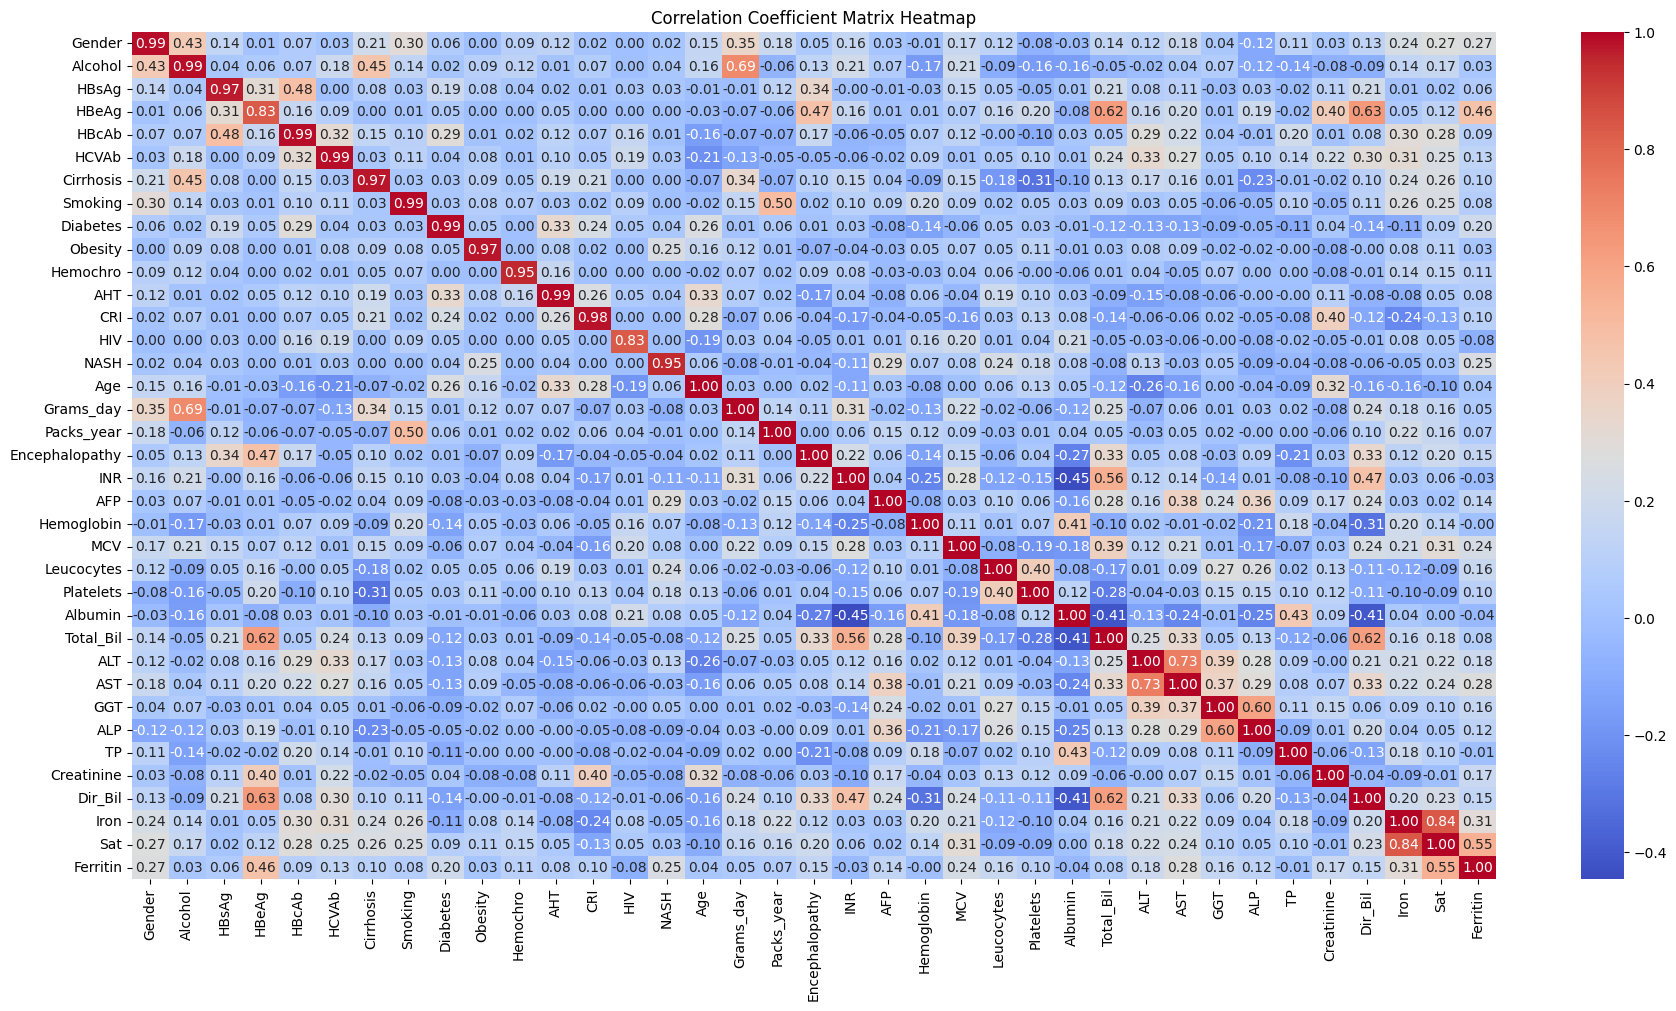

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency

# Function to calculate Phi coefficient for binary-binary categorical variables
def phi_coefficient(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = len(x)  # Total number of samples
    return np.sqrt(chi2 / n)

# Correlation matrix function for mixed data types
def mixed_corr_matrix(df):
    corr_matrix = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

    for col1 in df.columns:
        for col2 in df.columns:
            if df[col1].nunique() == 2 and df[col2].nunique() == 2:
                # Binary-binary correlation using Phi coefficient
                corr_matrix.loc[col1, col2] = phi_coefficient(df[col1], df[col2])
            elif df[col1].nunique() != 2 and df[col2].nunique() != 2:
                # Numerical-numerical correlation using Pearson's coefficient
                corr_matrix.loc[col1, col2] = df[[col1, col2]].corr(method='spearman').iloc[0, 1]
            else:
                # Binary-numerical correlation using Point-Biserial
                if df[col1].nunique() == 2:
                    corr_matrix.loc[col1, col2] = pointbiserialr(df[col1], df[col2])[0]
                else:
                    corr_matrix.loc[col1, col2] = pointbiserialr(df[col2], df[col1])[0]

    return corr_matrix


# Compute the mixed correlation matrix
corr_matrix = mixed_corr_matrix(X_Sym)

# Plot the heatmap
plt.figure(figsize=(22, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Coefficient Matrix Heatmap")
plt.show()


In [ ]:
Trans_Sym['Symptoms'] = dfn['Symptoms']
Y_Sym = dfn['Symptoms']


# Save the transformed data to a CSV file
Trans_Sym.to_csv('Trans_New_Sym.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('Trans_New_Sym.csv')

Trans_Sym.head(5)

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11,Dim12,Dim13,Symptoms
0,-1.065898,-6.542618,-1.419705,-0.965834,-4.068318,5.278266,-2.790864,3.625762,-2.181351,4.126781,4.078265,-4.920481,2.683985,0
1,-2.451160,4.812422,-0.360698,3.722604,-0.985181,2.974370,-2.460531,-3.585097,1.897321,-2.523144,-1.172484,-3.936349,2.740552,0
2,3.770097,-0.314168,5.800199,3.494283,-2.131295,-5.673620,6.268657,2.851233,-4.414260,0.319318,-0.894140,0.604414,2.050542,0
3,-2.510827,-3.320424,3.269786,1.981568,-1.187716,-1.049616,-1.967320,-0.782460,2.534760,-1.542905,0.747243,-1.899880,1.052542,1
4,4.205791,-0.558226,5.632160,4.010254,-1.807861,-5.536799,6.101441,2.782592,-4.620263,0.061093,-0.966492,0.893007,1.582405,1


In [ ]:
X_trans_sym = Trans_Sym.drop('Symptoms', axis=1)
Y_trans_sym = Trans_Sym['Symptoms']

# Save the transformed data to a CSV file
X_trans_sym.to_csv('Trans_N_Sym.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('Trans_N_Sym.csv')

num_columns_sym = X_trans_sym.shape[1]
print("Number of columns:", num_columns_sym)


Number of columns: 13


**Symptoms Prediction Model**

In [ ]:

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_trans_sym, Y_trans_sym, test_size=0.2, random_state=41)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth= num_columns_sym,
    criterion='entropy',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=41)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))


# Make predictions on the training set
y_train_pred = clf.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {training_accuracy:.2f}')


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.85      0.90      0.88        31

    accuracy                           0.80        41
   macro avg       0.74      0.70      0.72        41
weighted avg       0.79      0.80      0.80        41

Training Accuracy: 1.00


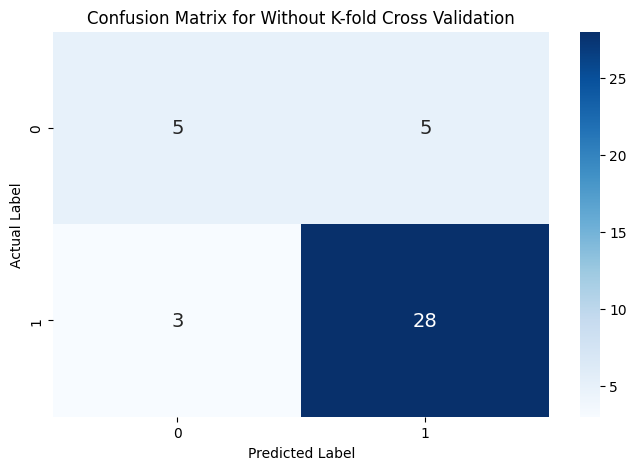

Specificity: 0.50


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',annot_kws={"size": 14},
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Without K-fold Cross Validation')
plt.show()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate specificity
specificity = TN / (TN + FP)

# Print specificity
print(f'Specificity: {specificity:.2f}')

In [ ]:
# Usng K-Fold Cross Validation Method

# Use  K-Fold Cross Validation Method for reduce the Overfitting of the Model and ensure the stability.
# can provide reliable performance matrix.
# reduce the randomness of the data splitting.

from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier
rf_model_sym = RandomForestClassifier(n_estimators=100,
    max_depth= num_columns_sym,
    criterion='entropy',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=41)

# Train the classifier
rf_model_sym.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores_sym = cross_val_score(rf_model_sym, X_trans_sym, Y_trans_sym, cv=6)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_sym)
print("Mean CV Score:", np.mean(cv_scores_sym))

# Make predictions on the training set
y_train_pred = rf_model_sym.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {training_accuracy:.2f}')

Cross-Validation Scores: [0.76470588 0.70588235 0.73529412 0.70588235 0.82352941 0.94117647]
Mean CV Score: 0.7794117647058824
Training Accuracy: 1.00


**Visualization of Random Decision Tree on the Random Foret Architecture**

In [ ]:
pip install graphviz

Cross-Validation Scores: [0.75609756 0.70731707 0.70731707 0.7804878  0.9       ]
Mean CV Score: 0.7702439024390244


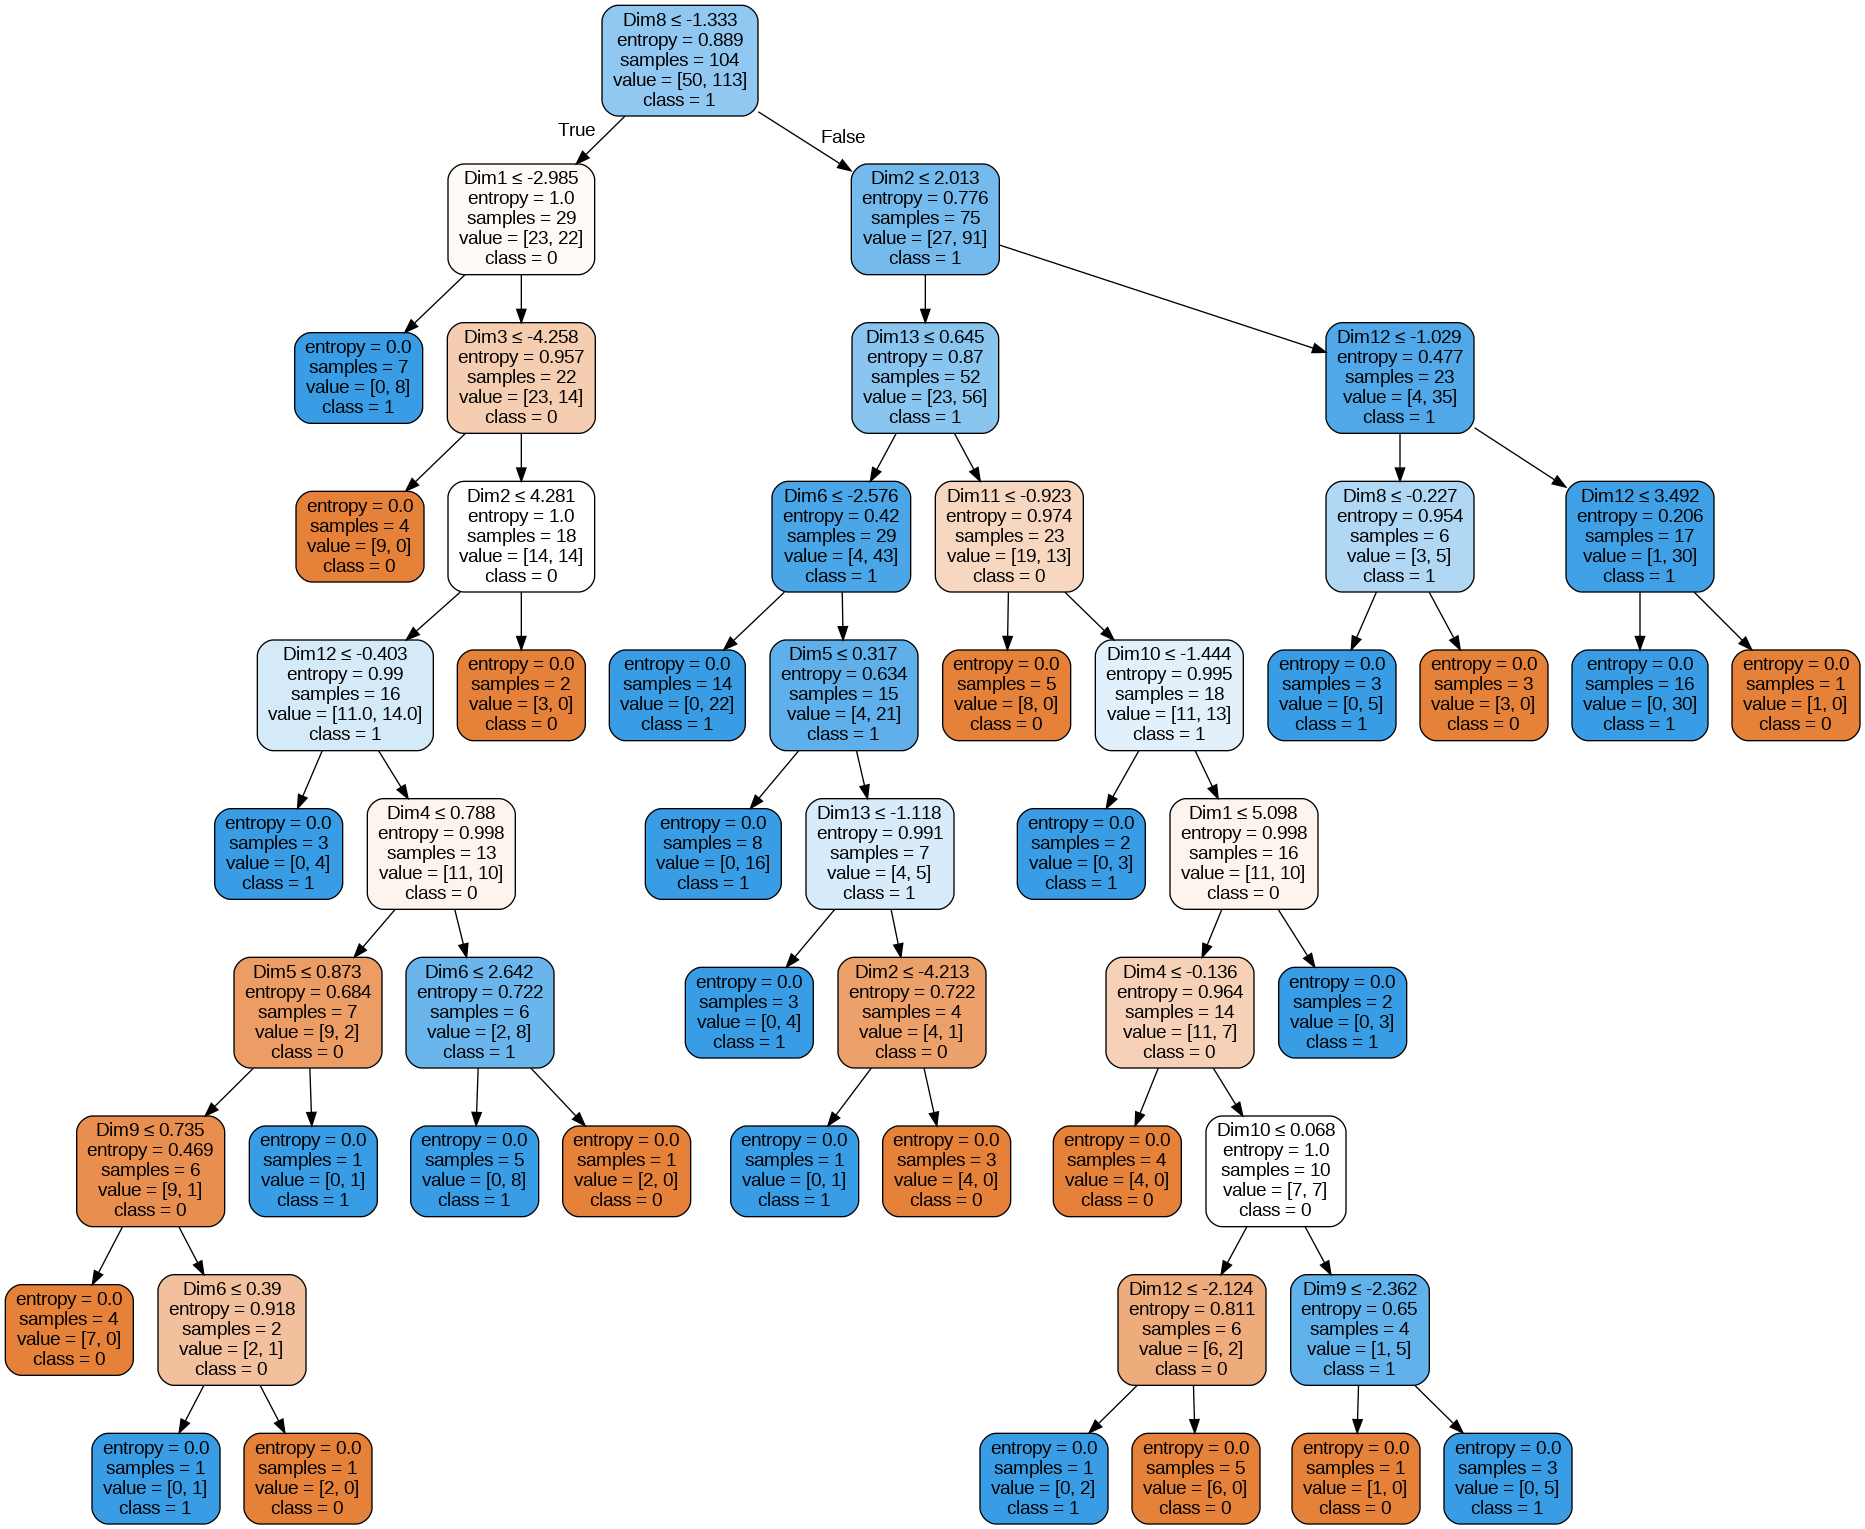

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import graphviz

# Assuming X_train, y_train, X_trans_sym, Y_trans_sym are already defined
# Create a Random Forest Classifier
rf_model_sym = RandomForestClassifier(n_estimators=100,
    max_depth= num_columns_sym,
    criterion='entropy',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=41,
    max_features='sqrt')

# Train the classifier
rf_model_sym.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores_sym = cross_val_score(rf_model_sym, X_trans_sym, Y_trans_sym, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_sym)
print("Mean CV Score:", np.mean(cv_scores_sym))

# Make predictions on the training set
y_train_pred = rf_model_sym.predict(X_train)


# Visualize a random decision tree from the forest
random_tree_index = np.random.randint(0, len(rf_model_sym.estimators_))
random_tree = rf_model_sym.estimators_[random_tree_index]

# Export the tree to Graphviz format
dot_data = export_graphviz(
    random_tree,
    out_file=None,  # Export as a string for visualization
    feature_names=X_train.columns,
    class_names=[str(cls) for cls in rf_model_sym.classes_],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render the tree as a PNG file and display it inline
graph = graphviz.Source(dot_data)
graph.format = 'png'  # Set output format to PNG
graph.render("random_tree")  # Save the image as random_tree.png

# Display the PNG inline (for Jupyter Notebook or IPython)
display(Image(filename="random_tree.png"))


Cross-Validation Scores: [0.70588235 0.70588235 0.73529412 0.70588235 0.73529412 0.79411765]
Mean CV Score: 0.7303921568627452


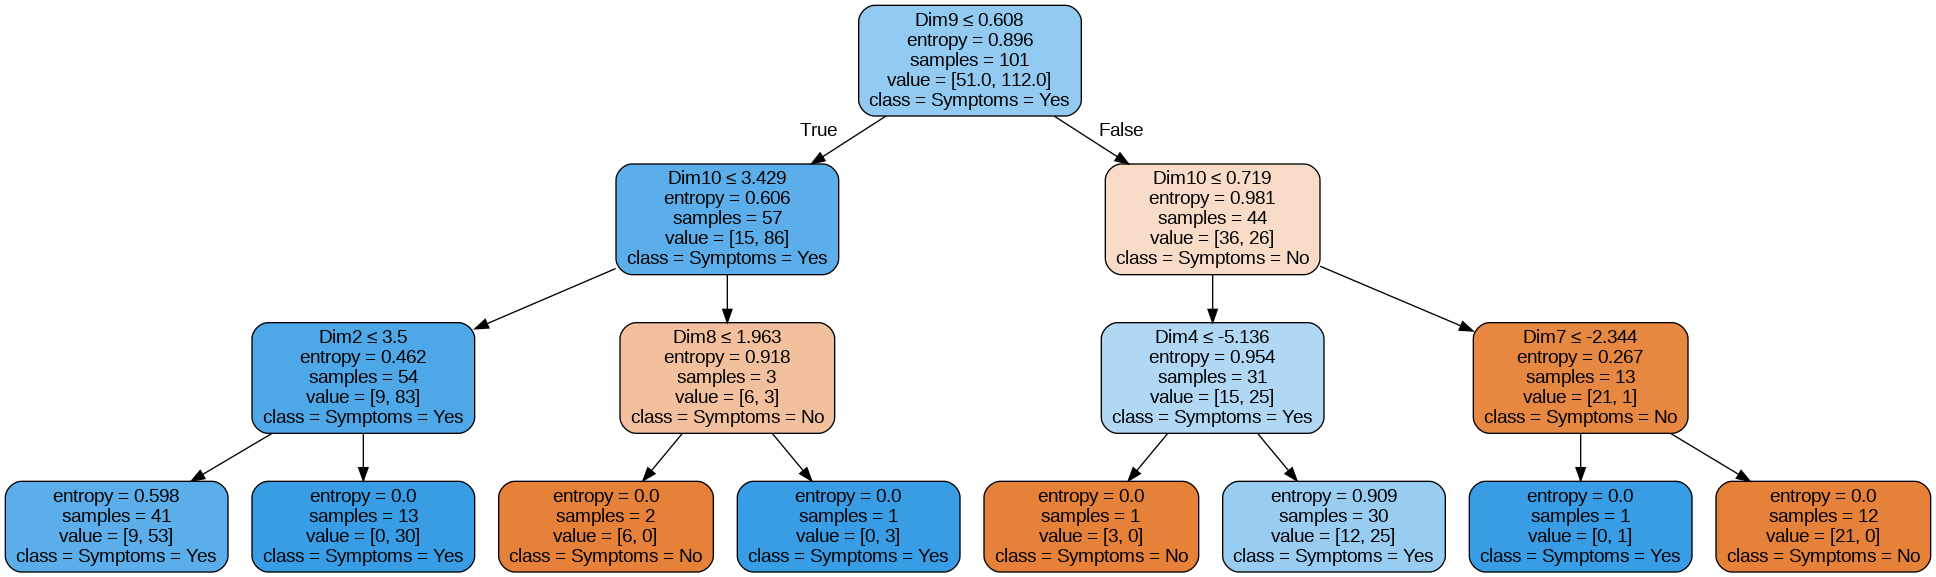

Information Gain for Tree 1:
Feature: Dim8, Gain: 0.9183
Feature: Dim10, Gain: 0.3741
Feature: Dim7, Gain: 0.2668
Feature: Dim9, Gain: 0.1477
Feature: Dim4, Gain: 0.1136
Feature: Dim2, Gain: 0.0593




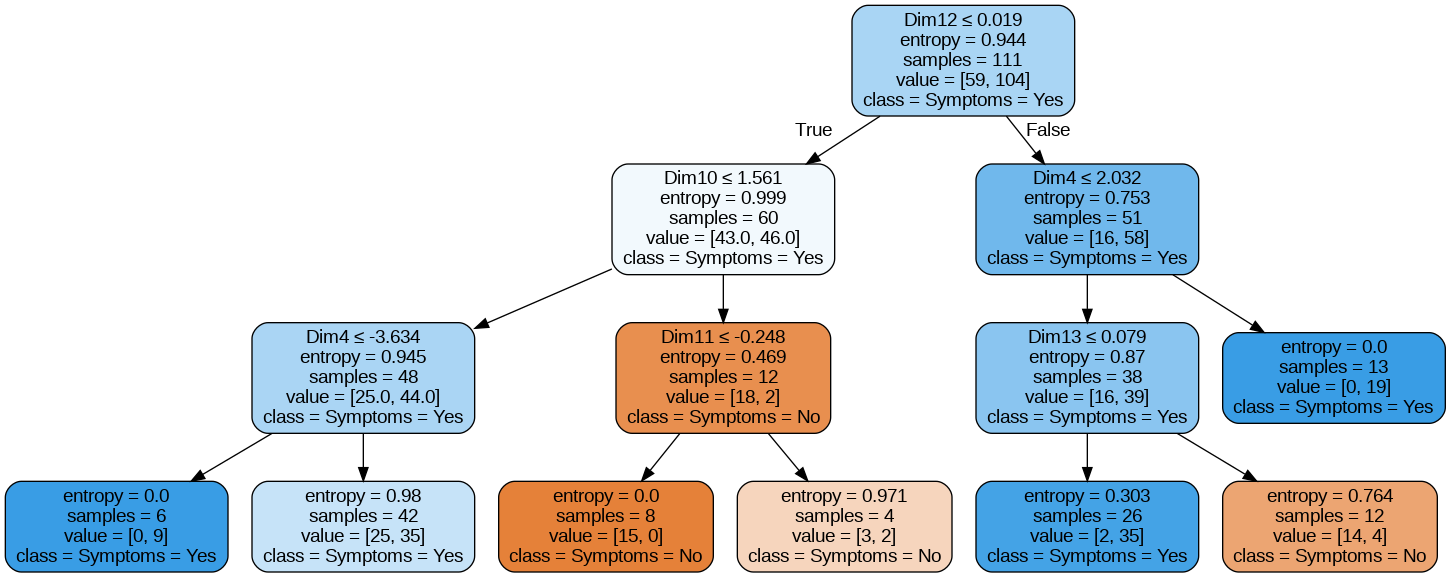

Information Gain for Tree 2:
Feature: Dim13, Gain: 0.4157
Feature: Dim11, Gain: 0.2263
Feature: Dim4, Gain: 0.1992
Feature: Dim10, Gain: 0.1615
Feature: Dim12, Gain: 0.0568




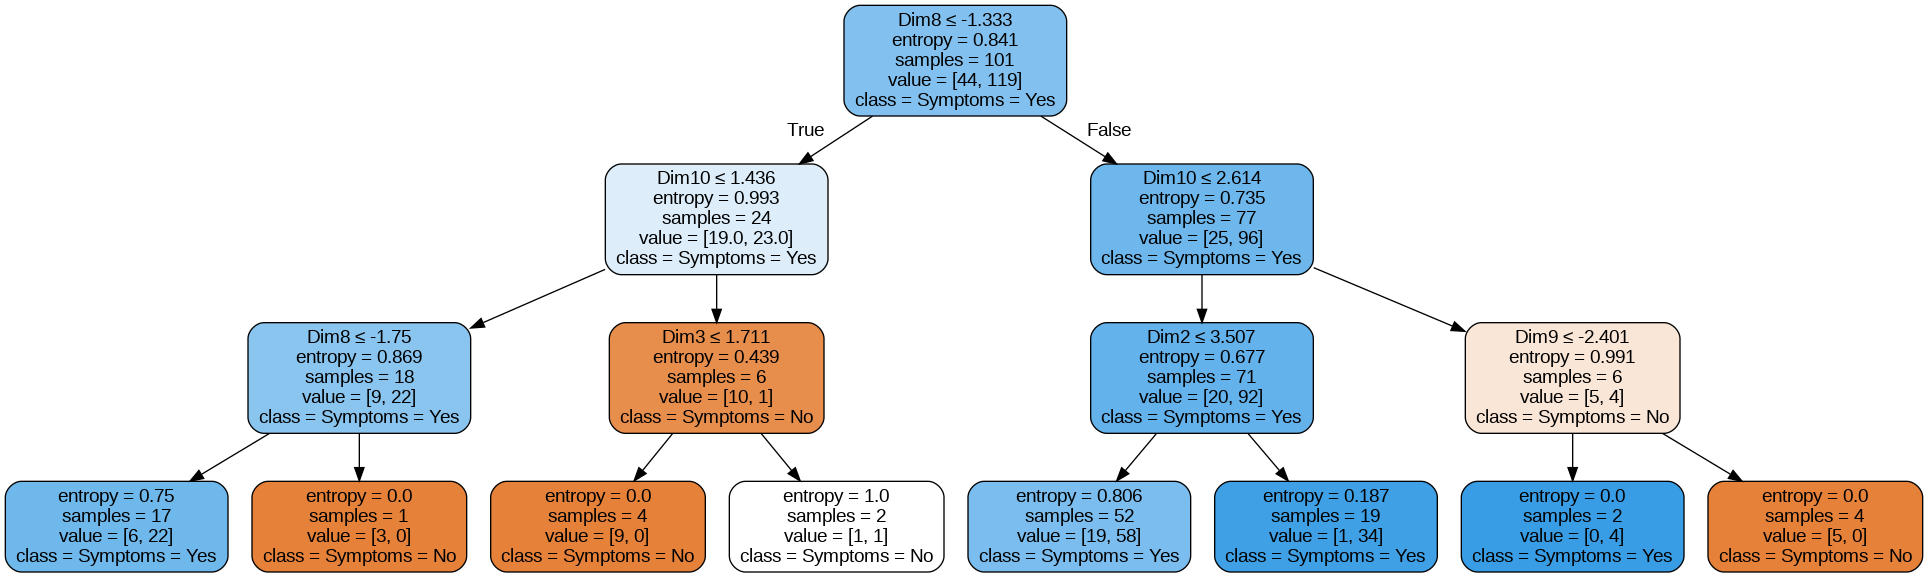

Information Gain for Tree 3:
Feature: Dim9, Gain: 0.9911
Feature: Dim10, Gain: 0.2715
Feature: Dim3, Gain: 0.2577
Feature: Dim8, Gain: 0.2319
Feature: Dim2, Gain: 0.0643




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import graphviz
import math

square_root = math.sqrt(13)
integer_square_root = int(square_root)

# Assuming X_train, y_train, X_trans_sym, Y_trans_sym are already defined
# Create a Random Forest Classifier
rf_model_sym = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    criterion='entropy',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=41,
    max_features = 'sqrt'
)

# Train the classifier
rf_model_sym.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores_sym = cross_val_score(rf_model_sym, X_trans_sym, Y_trans_sym, cv=6)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_sym)
print("Mean CV Score:", np.mean(cv_scores_sym))

# Make predictions on the training set
y_train_pred = rf_model_sym.predict(X_train)

# Function to calculate information gain for a given decision tree
def calculate_information_gain(tree, feature_names):
    node_features = tree.tree_.feature
    node_impurities = tree.tree_.impurity
    node_samples = tree.tree_.weighted_n_node_samples

    info_gain = {}
    for i in range(tree.tree_.node_count):
        if node_features[i] != -2:  # Only split nodes have features
            left_child = tree.tree_.children_left[i]
            right_child = tree.tree_.children_right[i]

            # Calculate weighted impurity for children
            weighted_impurity_left = (
                node_samples[left_child] / node_samples[i]
            ) * node_impurities[left_child]
            weighted_impurity_right = (
                node_samples[right_child] / node_samples[i]
            ) * node_impurities[right_child]

            # Calculate information gain
            gain = node_impurities[i] - (
                weighted_impurity_left + weighted_impurity_right
            )
            feature_name = feature_names[node_features[i]]
            info_gain[feature_name] = info_gain.get(feature_name, 0) + gain

    return info_gain

# Visualize 3 random decision trees and compute their information gain
for i in range(3):
    random_tree_index = np.random.randint(0, len(rf_model_sym.estimators_))
    random_tree = rf_model_sym.estimators_[random_tree_index]

    # Export the tree to Graphviz format
    dot_data = export_graphviz(
        random_tree,
        out_file=None,  # Export as a string for visualization
        feature_names=X_train.columns,
        class_names=["Symptoms = No", "Symptoms = Yes"],
        filled=True,
        rounded=True,
        special_characters=True,
    )

    # Render the tree and save it as PNG
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    tree_filename = f"random_tree_{i}"
    graph.render(tree_filename)

    # Display the tree inline
    display(Image(filename=f"{tree_filename}.png"))

    # Calculate and print information gain
    info_gain = calculate_information_gain(random_tree, X_train.columns)
    sorted_info_gain = sorted(info_gain.items(), key=lambda x: x[1], reverse=True)
    print(f"Information Gain for Tree {i + 1}:")
    for feature, gain in sorted_info_gain:
        print(f"Feature: {feature}, Gain: {gain:.4f}")
    print("\n")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Define the parameter grid for Randomized Search
param_dist = {
    'n_estimators': [50, 100, 200, 300],        # Number of trees
    'max_depth': [None, 10, 20, 30, 50],       # Depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False]                 # Whether bootstrap samples are used
}

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=41)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter combinations to try
    scoring='accuracy',
    cv=6,       # 5-fold cross-validation
    verbose=2,
    random_state=41,
    n_jobs=-1   # Use all available cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Train the classifier with the best parameters on the entire training set
best_rf_model = random_search.best_estimator_

# Evaluate on the training set
y_train_pred = best_rf_model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {training_accuracy:.2f}')

# Evaluate using cross-validation
cv_scores = cross_val_score(best_rf_model, X_trans_sym, Y_trans_sym, cv=6)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Fitting 6 folds for each of 50 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
72 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Best Cross-Validation Score: 0.7048059964726631
Training Accuracy: 0.92
Cross-Validation Scores: [0.70588235 0.73529412 0.70588235 0.64705882 0.76470588 0.97058824]
Mean CV Score: 0.7549019607843137


Confusion Matrix:
 [[ 25  38]
 [  7 134]]

Cross-Validated Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.40      0.53        63
           1       0.78      0.95      0.86       141

    accuracy                           0.78       204
   macro avg       0.78      0.67      0.69       204
weighted avg       0.78      0.78      0.75       204

Overall Cross-Validated Accuracy: 0.78
Confusion Matrix:
 [[ 25  38]
 [  7 134]]


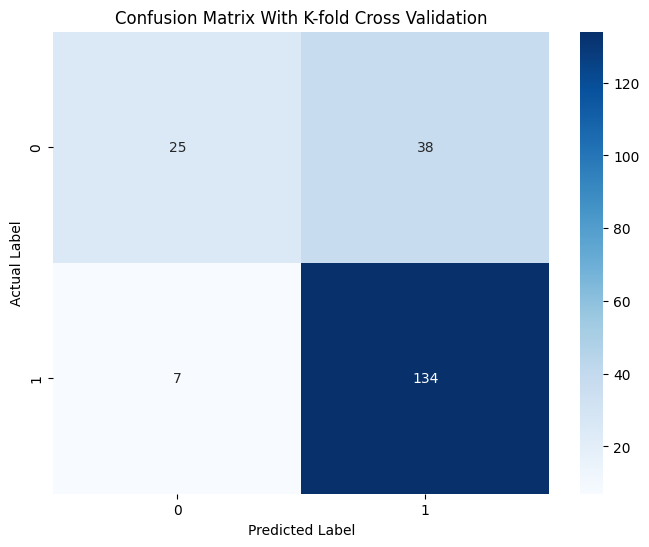

Specificity: 0.40


In [ ]:
from sklearn.model_selection import cross_val_predict

# Perform 6-fold cross-validation to get predictions for each data point
y_pred_cv = cross_val_predict(rf_model_sym, X_trans_sym, Y_trans_sym, cv=6)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_trans_sym, y_pred_cv)
print("Confusion Matrix:\n", conf_matrix)

# Additional metrics
print("\nCross-Validated Classification Report:")
print(classification_report(Y_trans_sym, y_pred_cv))

# Calculate and print overall cross-validated accuracy
accuracy_cv = accuracy_score(Y_trans_sym, y_pred_cv)
print(f"Overall Cross-Validated Accuracy: {accuracy_cv:.2f}")


# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_trans_sym, y_pred_cv)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix With K-fold Cross Validation")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate specificity
specificity = TN / (TN + FP)

# Print specificity
print(f'Specificity: {specificity:.2f}')


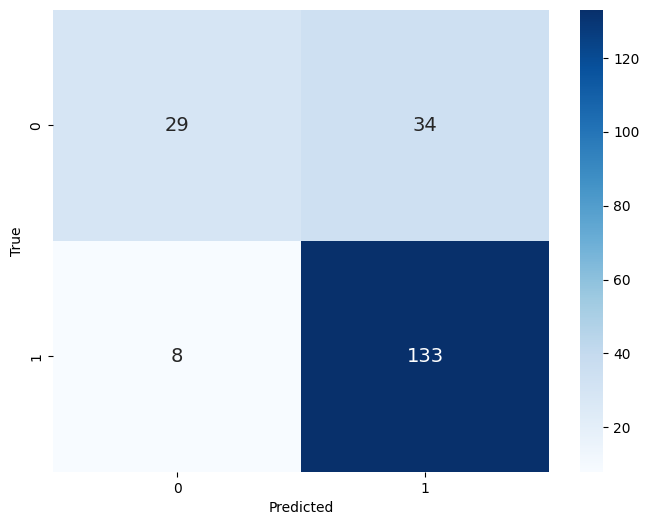

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define TP, TN, FP, FN values
TP = 133
TN = 29
FP = 34
FN = 8

# Construct the confusion matrix
cm = np.array([[TN, FP],
               [FN, TP]])

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, annot_kws={"size": 14},
            xticklabels=['0', '1'], yticklabels=['0', '1'])

# Labels and title
#plt.title('Confusion Matrix for Without K-fold Cross Validation')
plt.xlabel('Predicted')
plt.ylabel('True')

# Display the plot
plt.show()


In [ ]:
dfn_new = dfn.drop(['Symptoms','Class'], axis = 1)

dfn_new.head(5)

# Save the transformed data to a CSV file
dfn_new.to_csv('dfn_new.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('dfn_new.csv')

**Prediction of the New Patient's Symptom Status (Yes/No)**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import prince  # Make sure FAMD is installed



# Load the new patient data
new_patient_data = pd.read_csv('/content/drive/MyDrive/HCC - Research/ Data set/New Patient Details.csv')

# Assuming X_sym is already defined and is a DataFrame
# Get the first record from new_patient_data
first_record = new_patient_data.iloc[[0]]  # Use double brackets to get a DataFrame

# Append the first record to X_sym
dfn_new = pd.concat([dfn_new, first_record], ignore_index=True)

# Optionally, display the updated X_sym
print(dfn_new.tail(5))  # Show the last 5 records to confirm the addition

# Standardize the numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_convert = ['Age', 'Grams_day', 'Packs_year', 'INR','AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin',	'Total_Bil',
                     'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine','Dir_Bil', 'Iron', 'Sat', 'Ferritin']
dfn_new[columns_to_convert] = scaler.fit_transform(dfn_new[columns_to_convert])

print(dfn_new)






     Gender  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  Smoking  \
200       0        1      0      0      0      0          1        0   
201       1        1      0      0      0      0          1        0   
202       1        1      0      0      0      0          1        0   
203       0        0      0      0      0      0          0        0   
204       1        1      0      0      0      0          1        1   

     Diabetes  Obesity  ...   ALT    AST    GGT    ALP   TP  Creatinine  \
200         1        0  ...  24.0   56.0  229.0  231.0  6.5        0.78   
201         0        0  ...  66.0   68.0  469.0  304.0  7.0        1.07   
202         1        0  ...  29.0   48.0  203.0  197.0  7.2        1.08   
203         0        0  ...  76.0  101.0  730.0  579.0  7.2        2.13   
204         1        0  ...  26.0   59.0  115.0   63.0  6.1        0.59   

     Dir_Bil  Iron   Sat  Ferritin  
200     1.04  69.3  23.0      70.0  
201     1.57  71.2  29.0     106.0  
202  

In [ ]:
# Step 2: Apply FAMD using the prince package
!pip install prince
import pandas as pd
import prince



famd = prince.FAMD(
    n_components=37,
    copy=True,
    n_iter= 1,
    check_input=True,
)

famd_new = famd.fit(dfn_new)



In [ ]:
# Transform the data into new dimensions
transformed_data_new_patient = famd_new.transform(dfn_new)

# Assuming 'transformed_data' is your DataFrame with the transformed data
Sym_trans_new_patient = transformed_data_new_patient.iloc[:, :13]  # Slicing the first 14 columns
Sym_trans_new_patient.head(5)

last_record = Sym_trans_new_patient.iloc[-1:]

In [ ]:
# Newly added patient's transform data set
last_record

component,0,1,2,3,4,5,6,7,8,9,10,11,12
204,-2.255569,-3.885738,3.153175,1.512837,-1.298012,-1.162005,-2.43181,-1.039352,-3.044587,-1.416501,0.591758,-2.101944,0.661407


In [ ]:
# Make the prediction
prediction = rf_model_sym.predict(last_record)  # Use last_record_scaled if scaling is applied

# Display the prediction
print(f"Prediction for the last record: {prediction}")

# Make the prediction
prediction = rf_model_sym.predict(last_record)  # Use last_record_scaled if scaling is applied

# Display the prediction with a descriptive message
if prediction == 0:
    print("Prediction for the last record: The new patient has no symptoms about HCC.")
else:
    print("Prediction for the last record: The new patient has symptoms about HCC.")


Prediction for the last record: [1]
Prediction for the last record: The new patient has symptoms about HCC.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# List of possible k values
#k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
k_values = list(range(2, 21))

# Store mean accuracies for each k
mean_accuracies_sym = []

# Loop through each k value and perform cross-validation
for k in k_values:
    cv_scores_sym = cross_val_score(rf_model_sym, X_trans_sym, Y_trans_sym, cv=k, scoring='accuracy')
    mean_accuracy_sym = np.mean(cv_scores_sym)
    mean_accuracies_sym.append(mean_accuracy_sym)
    print(f"Mean Accuracy for k={k}: {mean_accuracy_sym:.4f}")

# Find the optimal k
optimal_k_sym = k_values[np.argmax(mean_accuracies_sym)] # Use the correct list of accuracies
print(f"Optimal k: {optimal_k_sym}")

Mean Accuracy for k=2: 0.7500
Mean Accuracy for k=3: 0.7647
Mean Accuracy for k=4: 0.7843
Mean Accuracy for k=5: 0.7702
Mean Accuracy for k=6: 0.7794
Mean Accuracy for k=7: 0.7796
Mean Accuracy for k=8: 0.7948
Mean Accuracy for k=9: 0.7852
Mean Accuracy for k=10: 0.7890
Mean Accuracy for k=11: 0.7759
Mean Accuracy for k=12: 0.7843
Mean Accuracy for k=13: 0.7811
Mean Accuracy for k=14: 0.7905
Mean Accuracy for k=15: 0.7755
Mean Accuracy for k=16: 0.7865
Mean Accuracy for k=17: 0.7941
Mean Accuracy for k=18: 0.8051
Mean Accuracy for k=19: 0.7962
Mean Accuracy for k=20: 0.8045
Optimal k: 18


Mean Accuracy for k=2: 0.7500
Mean Accuracy for k=3: 0.7647
Mean Accuracy for k=4: 0.7843
Mean Accuracy for k=5: 0.7702
Mean Accuracy for k=6: 0.7794
Mean Accuracy for k=7: 0.7796
Mean Accuracy for k=8: 0.7948
Mean Accuracy for k=9: 0.7852
Mean Accuracy for k=10: 0.7890
Mean Accuracy for k=11: 0.7759
Mean Accuracy for k=12: 0.7843
Mean Accuracy for k=13: 0.7811
Mean Accuracy for k=14: 0.7905
Mean Accuracy for k=15: 0.7755
Mean Accuracy for k=16: 0.7865
Mean Accuracy for k=17: 0.7941
Mean Accuracy for k=18: 0.8051
Mean Accuracy for k=19: 0.7962
Mean Accuracy for k=20: 0.8045
Optimal k: 18


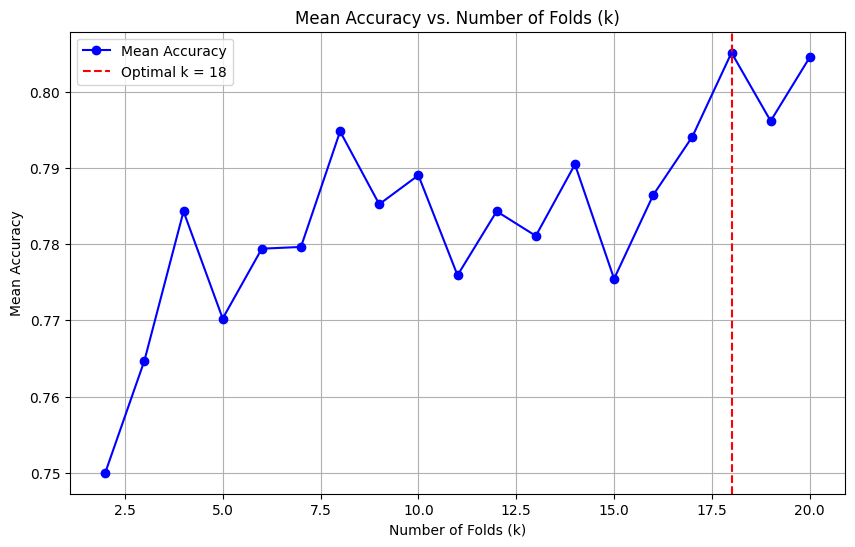

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of k values
k_values = list(range(2, 21))

# Store mean accuracies for each k
mean_accuracies_sym = []

# Loop through each k value and perform cross-validation
for k in k_values:
    cv_scores_sym = cross_val_score(rf_model_sym, X_trans_sym, Y_trans_sym, cv=k, scoring='accuracy')
    mean_accuracy_sym = np.mean(cv_scores_sym)
    mean_accuracies_sym.append(mean_accuracy_sym)
    print(f"Mean Accuracy for k={k}: {mean_accuracy_sym:.4f}")

# Find the optimal k
optimal_k_sym = k_values[np.argmax(mean_accuracies_sym)]  # Use the correct list of accuracies
print(f"Optimal k: {optimal_k_sym}")

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies_sym, marker='o', linestyle='-', color='b', label='Mean Accuracy')
plt.axvline(x=optimal_k_sym, color='r', linestyle='--', label=f'Optimal k = {optimal_k_sym}')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Folds (k)')
plt.legend()
plt.grid()
plt.show()


**Optimum K value uisng KNN Algoritthm**

[33, 26, 30, 28, 29, 31, 33, 34, 31, 27, 29, 29, 29, 29, 28, 27, 28, 27, 30]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


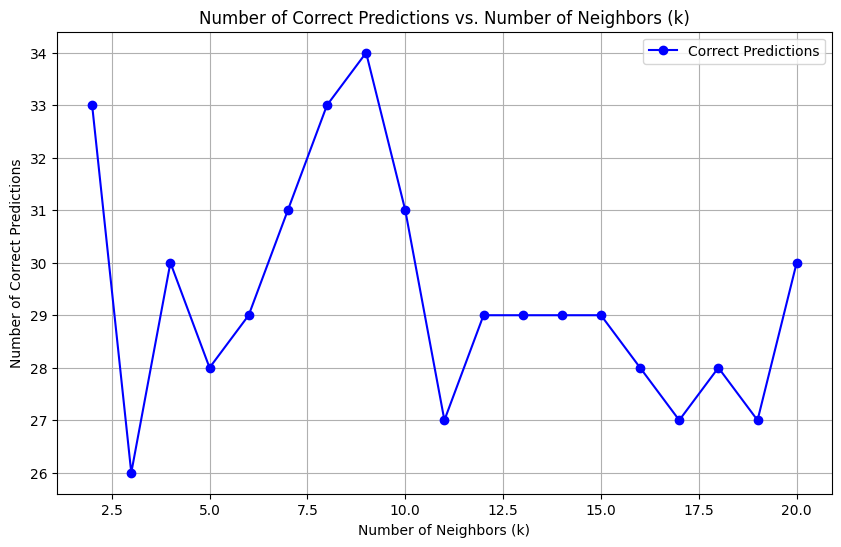

Size of the test set: 41 samples


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_trans_sym, Y_trans_sym, test_size=0.2, random_state=42)


correct_sum = []
for i in range (1,20):
  knn_sym = KNeighborsClassifier(n_neighbors=i)
  knn_sym.fit(X_train, y_train)
  y_pre_sym = knn_sym.predict(X_test)
  correct = np.sum(y_pre_sym == y_test)
  correct_sum.append(correct)

print(correct_sum)
print(k_values)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, correct_sum, marker='o', linestyle='-', color='b', label="Correct Predictions")


# Adding labels and title
plt.title("Number of Correct Predictions vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Number of Correct Predictions")

plt.grid()
plt.legend()
plt.show()

# Display the size of the test set
print(f"Size of the test set: {X_test.shape[0]} samples")

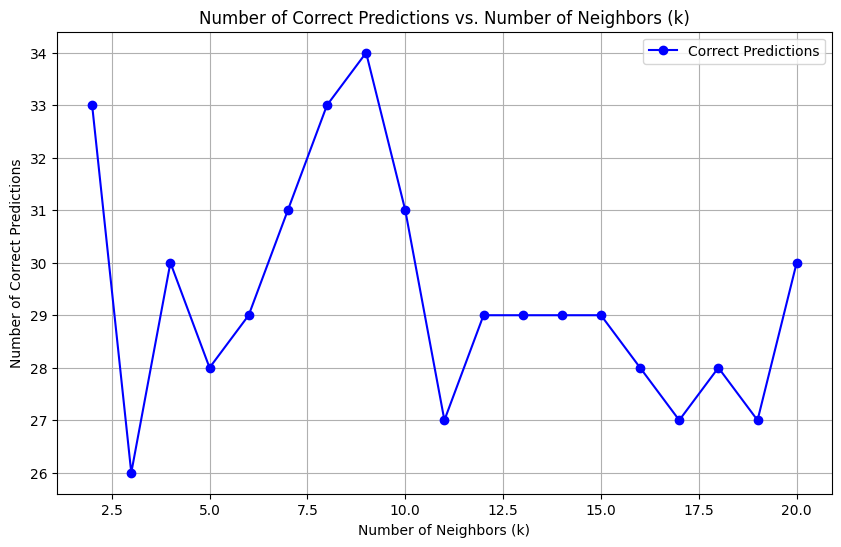

In [ ]:
# Find the maximal y-axis value and its corresponding k value
max_correct = max(correct_sum)
optimal_k = k_values[np.argmax(correct_sum)]

# Plotting the results with the maximal y-axis value marked
plt.figure(figsize=(10, 6))
plt.plot(k_values, correct_sum, marker='o', linestyle='-', color='b', label="Correct Predictions")
#plt.scatter(optimal_k, max_correct, color='red', zorder=5, label=f"Max Correct = {max_correct} at k = {optimal_k}")
#plt.axhline(max_correct, color='red', linestyle='--', alpha=0.6, label="Max Correct (horizontal line)")

# Adding labels and title
plt.title("Number of Correct Predictions vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Number of Correct Predictions")
plt.grid()
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Data (value column extracted from your dataset)
data = [0.706041592, 0.542938402, 0.474514626, 0.472114858, 0.464968693,
        0.449117396, 0.427941945, 0.377641764, 0.377145473, 0.376973746,
        0.359432683, 0.284539337, 0.262745943, 0.256565918, 0.252672551,
        0.247921585, 0.240097868, 0.239611231, 0.222426370, 0.166021847,
        0.150162499, 0.134219465, 0.131998584, 0.123221132, 0.099318003,
        0.098859849, 0.098593917, 0.092312168, 0.091026123, 0.086635274,
        0.072513619, 0.061713143, 0.060483305, 0.059944979, 0.054646541,
        0.038458618, 0.03822826]

# Calculate percentiles
percentile_33 = np.percentile(data, 33)
percentile_66 = np.percentile(data, 66)

# Categorize data
categories = ['Low' if x <= percentile_33
              else 'Moderate' if x <= percentile_66
              else 'High' for x in data]

# Create DataFrame for better visualization
df = pd.DataFrame({'Value': data, 'Category': categories})
df_sorted = df.sort_values('Value', ascending=True).reset_index(drop=True)

print(df_sorted)


       Value  Category
0   0.038228       Low
1   0.038459       Low
2   0.054647       Low
3   0.059945       Low
4   0.060483       Low
5   0.061713       Low
6   0.072514       Low
7   0.086635       Low
8   0.091026       Low
9   0.092312       Low
10  0.098594       Low
11  0.098860       Low
12  0.099318  Moderate
13  0.123221  Moderate
14  0.131999  Moderate
15  0.134219  Moderate
16  0.150162  Moderate
17  0.166022  Moderate
18  0.222426  Moderate
19  0.239611  Moderate
20  0.240098  Moderate
21  0.247922  Moderate
22  0.252673  Moderate
23  0.256566  Moderate
24  0.262746      High
25  0.284539      High
26  0.359433      High
27  0.376974      High
28  0.377145      High
29  0.377642      High
30  0.427942      High
31  0.449117      High
32  0.464969      High
33  0.472115      High
34  0.474515      High
35  0.542938      High
36  0.706042      High


In [ ]:
result = pd.DataFrame(data = correct_sum)
result.index = result.index + 1
result.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,32,31,33,25,28,27,29,27,28,28,32,31,32,32,32,32,32,33,32


**Handling New Patient's Missiing Data - KNN Imputation**

In [ ]:
dfn_new_missing = pd.read_csv('/content/drive/MyDrive/HCC - Research/ Data set/dfn_new_missing.csv')
dfn_new_missing.iloc[-1]



,203
Gender,0.00
Alcohol,1.00
HBsAg,0.00
HBeAg,0.00
HBcAb,1.00
HCVAb,1.00
Cirrhosis,0.00
Smoking,1.00
Diabetes,NaN
Obesity,NaN


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer


# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=3)

# Apply KNN imputation
df_imputed = pd.DataFrame(imputer.fit_transform(dfn_new_missing), columns=dfn_new_missing.columns)

# Verify the result by checking if there are any missing values left
missing_values_count = df_imputed.isnull().sum().sum()
print("Total missing values after imputation:", missing_values_count)

# Save the imputed DataFrame if desired
# df_imputed.to_csv('/mnt/data/hcc_data_imputed.csv', index=False)



Total missing values after imputation: 0


In [ ]:
df_imputed.iloc[-1]

,203
Gender,0.0000
Alcohol,1.0000
HBsAg,0.0000
HBeAg,0.0000
HBcAb,1.0000
HCVAb,1.0000
Cirrhosis,0.0000
Smoking,1.0000
Diabetes,0.0625
Obesity,0.0625


**Survival Status Prediction Model**

In [ ]:
# Now these features are part of dfn and will be included in X_Sur
X_Sur = data.drop(['Class','Endemic','PS'], axis=1)
Y_Sur = data['Class']




In [ ]:

# Save the transformed data to a CSV file
X_Sur.to_csv('Trans_N_Sur.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('Trans_N_Sur.csv')

In [ ]:
num_Sur = X_Sur.shape[1]
print(num_Sur)
print(f'Number of Features: {num_Sur:.2f}')

columns_Sur = list(X_Sur.columns)
print(columns_Sur)



47
Number of Features: 47.00
['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']


In [ ]:
# Standardize the numerical columns
from sklearn.preprocessing import StandardScaler

# Only use the Numerical Features
scaler = StandardScaler()
columns_to_convert = ['Age', 'Grams_day', 'Packs_year', 'INR','AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', 'Albumin',	'Total_Bil',
                     'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine','Dir_Bil', 'Iron', 'Sat', 'Ferritin']
X_Sur[columns_to_convert] = scaler.fit_transform(X_Sur[columns_to_convert])
print(X_Sur)


     Gender  Symptoms  Alcohol  HBsAg  HBeAg  HBcAb  HCVAb  Cirrhosis  \
0         1         0        1      0      0      0      0          1   
1         0         0        0      0      0      0      1          1   
2         1         0        1      1      0      1      0          1   
3         1         1        1      0      0      0      0          1   
4         1         1        1      1      0      1      0          1   
..      ...       ...      ...    ...    ...    ...    ...        ...   
199       0         0        0      0      0      0      1          1   
200       0         1        1      0      0      0      0          1   
201       1         1        1      0      0      0      0          1   
202       1         1        1      0      0      0      0          1   
203       0         1        0      0      0      0      0          0   

     Smoking  Diabetes  ...       GGT       ALP        TP  Creatinine  Nodule  \
0          1         1  ... -0.352266 -0.4

**Factor Analysis for Mixed Data - Survival Status Prediction Model**

In [ ]:
# Assuming your DataFrame is named 'data'
number_of_columns_sur = X_Sur.shape[1]
print("Number of columns:", number_of_columns_sur)

Number of columns: 47


In [ ]:
# Step 2: Apply FAMD using the prince package
!pip install prince
import pandas as pd
import prince



famd_sur = prince.FAMD(
    n_components=number_of_columns_sur,
    copy=True,
    n_iter= 1,
    check_input=True,
)

# Reset index of X_Sur to ensure it starts from 0
#X_Sur = X_Sur.reset_index(drop=True)

famd_sur = famd_sur.fit(X_Sur)



In [ ]:
# Transform the data into new dimensions
transformed_data_sur = famd_sur.transform(X_Sur)

# Retrieve the eigenvalues (proportional variances)
eigenvalues_sur = famd_sur.eigenvalues_

# Calculate the percentage of variance explained by each dimension
explained_variance_ratio_sur = famd_sur.cumulative_percentage_of_variance_

# Display the transformed data and variance information
transformed_data_sur, eigenvalues_sur, explained_variance_ratio_sur

# Eigenvectors
summary_sur = famd_sur.eigenvalues_summary

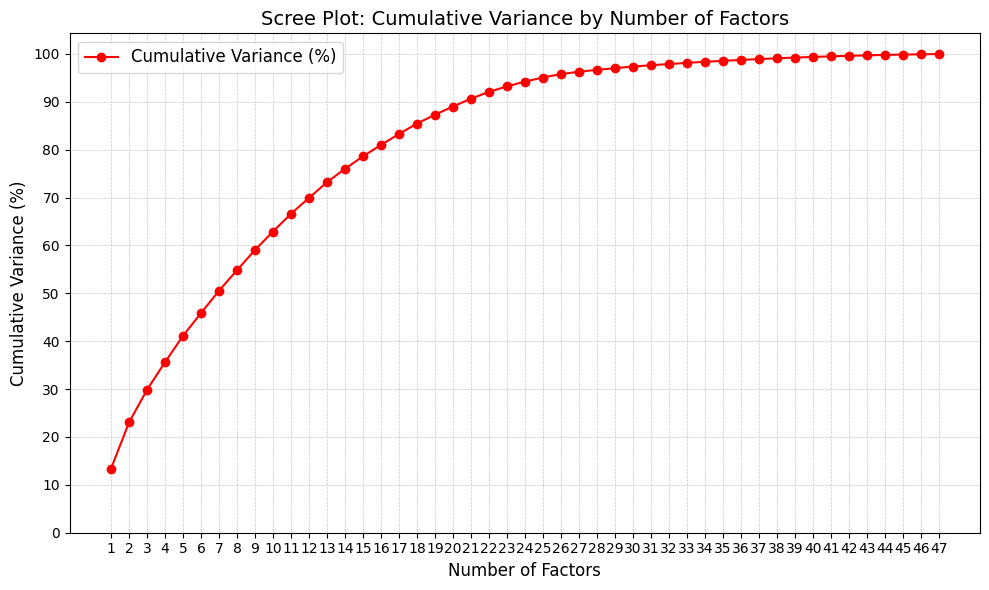

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your FAMD results
# explained_variance_ratio_sur should already be computed as cumulative percentages
# Example: explained_variance_ratio_sur = [10, 18, 25, 30, ..., 100]
# Number of dimensions (factors)
dimensions = np.arange(1, len(explained_variance_ratio_sur) + 1)

# Scree plot
plt.figure(figsize=(10, 6))

# Plot cumulative variance percentage
plt.plot(dimensions, explained_variance_ratio_sur, color='red', marker='o', linestyle='-', label='Cumulative Variance (%)')

# Add labels and title
plt.xlabel('Number of Factors', fontsize=12)
plt.ylabel('Cumulative Variance (%)', fontsize=12)
plt.title('Scree Plot: Cumulative Variance by Number of Factors', fontsize=14)

# Add grid and ticks
plt.xticks(dimensions)  # Ensure all factors are labeled
plt.yticks(np.arange(0, 110, 10))  # Y-axis in steps of 10%
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


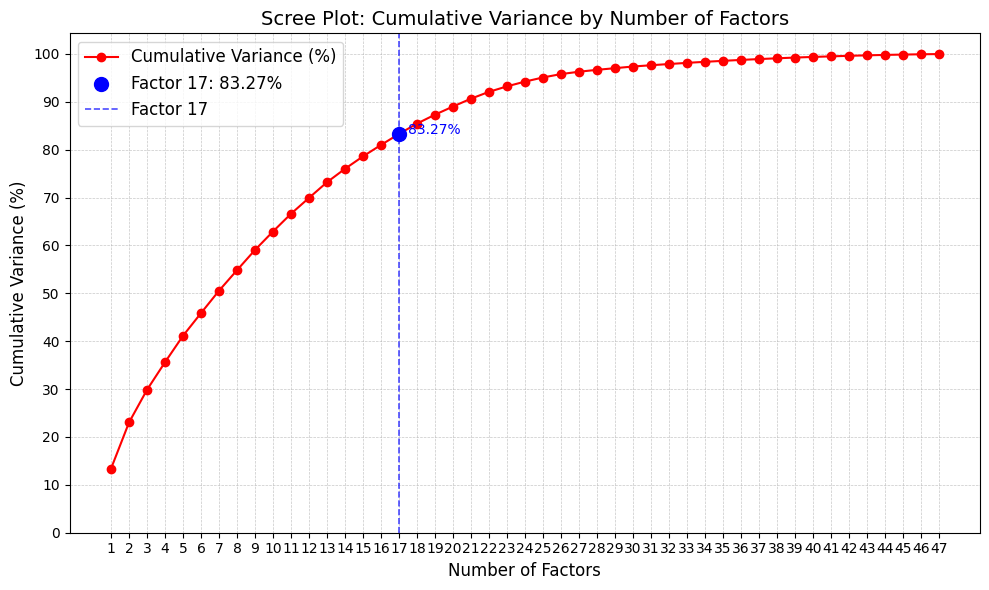

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your FAMD results
# explained_variance_ratio_sur should already be computed as cumulative percentages
# Example: explained_variance_ratio_sur = [10, 18, 25, 30, ..., 100]
dimensions = np.arange(1, len(explained_variance_ratio_sur) + 1)

# Highlight factor 17
highlight_factor = 17
highlight_value = explained_variance_ratio_sur[highlight_factor - 1]  # Cumulative percentage for factor 17

# Scree plot
plt.figure(figsize=(10, 6))

# Plot cumulative variance percentage
plt.plot(dimensions, explained_variance_ratio_sur, color='red', marker='o', linestyle='-', label='Cumulative Variance (%)')

# Highlight factor 17 with a marker
plt.scatter(highlight_factor, highlight_value, color='blue', s=100, zorder=5, label=f'Factor {highlight_factor}: {highlight_value:.2f}%')

# Add a vertical dashed line for factor 17
plt.axvline(x=highlight_factor, color='blue', linestyle='--', linewidth=1.2, alpha=0.7, label=f'Factor {highlight_factor}')

# Annotate the cumulative variance value
plt.text(
    highlight_factor + 0.5, highlight_value,  # Position annotation slightly to the right of the point
    f'{highlight_value:.2f}%', fontsize=10, color='blue'
)

# Add labels, title, and grid
plt.xlabel('Number of Factors', fontsize=12)
plt.ylabel('Cumulative Variance (%)', fontsize=12)
plt.title('Scree Plot: Cumulative Variance by Number of Factors', fontsize=14)

# Add grid and ticks
plt.xticks(dimensions)  # Ensure all factors are labeled
plt.yticks(np.arange(0, 110, 10))  # Y-axis in steps of 10%
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
plt.legend(fontsize=12)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
# Print the transformed data and variance information
print("Transformed Data_sur:")
print(transformed_data_sur)


# Save the transformed data to a CSV file
transformed_data_sur.to_csv('transformed_data_sur.csv', index=False)


# Download the file in Google Colab
from google.colab import files
#files.download('transformed_data.csv')

Transformed Data_sur:
component         0         1         2         3         4         5   \
0          -0.942157 -5.649781  4.472611 -5.067703 -0.662306  2.899953   
1          -6.737940  0.445598  4.934700 -5.849924 -2.784124  1.727868   
2           1.065697  2.923764 -6.766279 -4.790193  4.577718 -5.187859   
3          -6.321981 -2.012088 -6.013713 -2.312780  4.102067 -3.396518   
4          -3.094366  5.537203 -6.238512 -6.313307  4.700432 -5.350893   
..               ...       ...       ...       ...       ...       ...   
199        -5.842229  2.837620  6.688776 -4.924915 -8.419243  3.924739   
200        -1.447938 -5.367576 -1.057600  5.843673 -3.453402  0.583435   
201        -1.938055 -1.425998 -0.077779  2.990972  1.266151 -0.892833   
202         0.784331 -6.063307 -8.383019 -0.652456 -4.349120 -3.376687   
203       -15.437620  4.835240 -5.201340  3.350508 -4.281801 -4.085249   

component        6         7          8         9   ...        37        38  \
0         

In [ ]:
print("\nExplained Inertia (Proportional Variances):")
print(explained_variance_ratio_sur)

#print(famd.column_contributions_)


Explained Inertia (Proportional Variances):
[13.38528894 23.02766629 29.85071634 35.60546871 41.12466051 45.86219794
 50.53867328 54.82150746 59.04599606 62.90303794 66.60145098 69.91981529
 73.19253182 75.99475563 78.58618241 80.97624564 83.26735473 85.43502676
 87.29784137 88.99987121 90.64131963 92.06677627 93.21514805 94.20992583
 95.07315889 95.77915102 96.27525818 96.66939566 97.01772233 97.36229597
 97.63151204 97.88085578 98.1260879  98.34505298 98.54644932 98.74141237
 98.91972022 99.07901608 99.23529298 99.36526834 99.48644076 99.60072386
 99.70034336 99.78923729 99.85920184 99.92179345 99.96825132]


In [ ]:
print(eigenvalues_sur)

[44.84071796 32.30196411 22.85721767 19.27842044 18.48929254 15.87075041
 15.66619237 14.34749451 14.15203681 12.92109031 12.38968368 11.11652042
 10.9636004   9.38744975  8.68127971  8.00671183  7.67521545  7.26170131
  6.24042893  5.70179998  5.4988522   4.77527974  3.84704545  3.33250557
  2.89183073  2.36507365  1.661959    1.32036053  1.16689437  1.1543217
  0.90187384  0.83530153  0.82152759  0.73353302  0.67467775  0.6531262
  0.59733131  0.53364114  0.52352762  0.43541744  0.4059276   0.38284839
  0.33372533  0.29779467  0.23438123  0.20968191  0.15563385]


In [ ]:
print(summary_sur)


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             44.841        13.39%                     13.39%
1             32.302         9.64%                     23.03%
2             22.857         6.82%                     29.85%
3             19.278         5.75%                     35.61%
4             18.489         5.52%                     41.12%
5             15.871         4.74%                     45.86%
6             15.666         4.68%                     50.54%
7             14.347         4.28%                     54.82%
8             14.152         4.22%                     59.05%
9             12.921         3.86%                     62.90%
10            12.390         3.70%                     66.60%
11            11.117         3.32%                     69.92%
12            10.964         3.27%                     73.19%
13             9.387         2.80%                     75.99%
14      

In [ ]:
import pandas as pd
# Get the loadings (contributions of variables to the components)
loadings_sur = famd_sur.column_coordinates_

# Print the loadings
print("Loadings:\n", loadings_sur)

# Save the DataFrame to a CSV file
loadings_sur.to_csv('famd_loadings_sur.csv', index=False)

from google.colab import files

# Download the CSV file
#files.download('famd_loadings_sur.csv')

Loadings:
 component             0         1         2         3         4   \
variable                                                           
Age             0.015821  0.043205  0.158418  0.020214  0.001692   
Grams_day       0.147716  0.127224  0.038230  0.000934  0.041461   
Packs_year      0.000544  0.001417  0.000734  0.092704  0.008375   
INR             0.128899  0.018457  0.002550  0.001025  0.015216   
AFP             0.000935  0.002951  0.007493  0.034854  0.038153   
Hemoglobin      0.021386  0.009009  0.044143  0.034787  0.033349   
MCV             0.082504  0.000110  0.000033  0.004266  0.031405   
Leucocytes      0.011301  0.016461  0.054187  0.010983  0.010274   
Platelets       0.051687  0.035525  0.048887  0.000006  0.001779   
Albumin         0.095797  0.005904  0.035589  0.043742  0.030297   
Total_Bil       0.187690  0.100733  0.018759  0.001635  0.031091   
ALT             0.033989  0.028072  0.009485  0.003253  0.033329   
AST             0.058320  0.029451  0

In [ ]:

# Assuming 'transformed_data' is your DataFrame with the transformed data
Sur_trans = transformed_data_sur.iloc[:, :17]  # Slicing the first 14 columns

# Create a new DataFrame with the first 12 columns
Trans_Sur = Sur_trans.copy()

# Update the column names to Dim1, Dim2, ..., Dim12
new_column_names_sur = [f'Dim{i+1}' for i in range(17)]
Trans_Sur.columns = new_column_names_sur

# Print the new DataFrame with updated column names
print("New DataFrame with Updated Column Names:")
print(Trans_Sur)

# Save the transformed data to a CSV file
Trans_Sur.to_csv('Trans_Sur.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('Trans_Sur.csv')

New DataFrame with Updated Column Names:
          Dim1      Dim2      Dim3      Dim4      Dim5      Dim6      Dim7  \
0    -0.942157 -5.649781  4.472611 -5.067703 -0.662306  2.899953  9.373099   
1    -6.737940  0.445598  4.934700 -5.849924 -2.784124  1.727868 -4.389982   
2     1.065697  2.923764 -6.766279 -4.790193  4.577718 -5.187859 -1.749438   
3    -6.321981 -2.012088 -6.013713 -2.312780  4.102067 -3.396518  0.317589   
4    -3.094366  5.537203 -6.238512 -6.313307  4.700432 -5.350893  2.995999   
..         ...       ...       ...       ...       ...       ...       ...   
199  -5.842229  2.837620  6.688776 -4.924915 -8.419243  3.924739 -4.650344   
200  -1.447938 -5.367576 -1.057600  5.843673 -3.453402  0.583435 -1.111446   
201  -1.938055 -1.425998 -0.077779  2.990972  1.266151 -0.892833  0.994704   
202   0.784331 -6.063307 -8.383019 -0.652456 -4.349120 -3.376687 -4.938106   
203 -15.437620  4.835240 -5.201340  3.350508 -4.281801 -4.085249 -2.668534   

         Dim8       Di

In [ ]:
Trans_Sur['Class'] = data['Class']
Y_Sur = data['Class']

# Save the transformed data to a CSV file
Trans_Sur.to_csv('Trans_New_Sur.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('Trans_New_Sym.csv')

Trans_Sur.head(5)

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11,Dim12,Dim13,Dim14,Dim15,Dim16,Dim17,Class
0,-0.942157,-5.649781,4.472611,-5.067703,-0.662306,2.899953,9.373099,0.099542,-3.737519,8.883153,-1.469202,-3.793498,-1.559598,-1.128200,0.223041,1.192282,5.244474,1
1,-6.737940,0.445598,4.934700,-5.849924,-2.784124,1.727868,-4.389982,3.492767,0.039436,-0.218217,0.257293,-3.110918,-2.086088,1.079285,-7.151312,0.594658,0.588400,1
2,1.065697,2.923764,-6.766279,-4.790193,4.577718,-5.187859,-1.749438,-4.382791,-4.633260,0.138167,6.369289,4.800363,4.892512,3.462525,3.241483,-3.517986,1.737156,1
3,-6.321981,-2.012088,-6.013713,-2.312780,4.102067,-3.396518,0.317589,-2.019958,-2.262977,2.305099,-1.077555,-5.497727,-2.744143,-0.159337,-2.612927,-2.262493,-0.582004,0
4,-3.094366,5.537203,-6.238512,-6.313307,4.700432,-5.350893,2.995999,-3.432015,-2.742840,2.639524,5.165703,8.379538,-0.690605,1.583097,1.196722,0.161463,-2.450699,1


In [ ]:
X_trans_sur = Trans_Sur.drop('Class', axis=1)
Y_trans_sur = Trans_Sur['Class']

# Save the transformed data to a CSV file
X_trans_sur.to_csv('Trans_N_Sym.csv', index=False)

# Download the file in Google Colab
from google.colab import files
#files.download('Trans_N_Sym.csv')

num_columns_sur = X_trans_sur.shape[1]
print("Number of columns:", num_columns_sur)


Number of columns: 17


**Survival Status Prediction Model**

In [ ]:

# Split data into training and testing sets (80% training, 20% testing)
X_train_sur, X_test_sur, y_train_sur, y_test_sur = train_test_split(X_trans_sur, Y_trans_sur, test_size=0.2, random_state=41)

# Initialize the RandomForestClassifier
clf_sur = RandomForestClassifier(n_estimators=20, max_depth= num_columns_sur, random_state=41)

# Train the classifier
clf_sur.fit(X_train_sur, y_train_sur)

# Make predictions on the test set
y_pred_sur = clf_sur.predict(X_test_sur)

# Calculate accuracy
accuracy_sur = accuracy_score(y_test_sur, y_pred_sur)
print(f'Accuracy: {accuracy_sur:.2f}')

# Display classification report
print(classification_report(y_test_sur, y_pred_sur))


from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test_sur, y_pred_sur)

# Extract TN and FP
tn, fp, fn, tp = cm.ravel()  # Assumes a binary classification

# Calculate specificity
specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.2f}')


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.84      0.84      0.84        19

    accuracy                           0.85        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.85      0.85      0.85        41

Specificity: 0.86


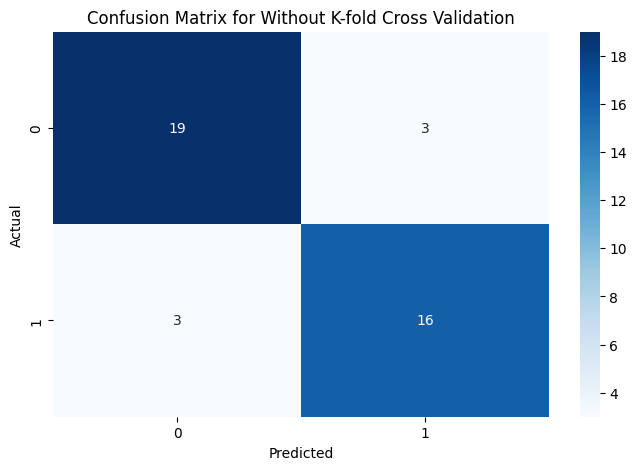

In [ ]:
# Calculate confusion matrix
conf_matrix_sur = confusion_matrix(y_test_sur, y_pred_sur)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_sur, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_sur), yticklabels=np.unique(y_test_sur))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Without K-fold Cross Validation')
plt.show()

In [ ]:
# Usng K-Fold Cross Validation Method

from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier
rf_model_sur = RandomForestClassifier(n_estimators=100, random_state=41, max_depth= num_columns_sur)

# Perform 5-fold cross-validation
cv_scores_sur = cross_val_score(rf_model_sur, X_trans_sur, Y_trans_sur, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_sur)
print("Mean CV Score:", np.mean(cv_scores_sur))

Cross-Validation Scores: [0.66666667 0.76190476 0.71428571 0.9047619  0.65       0.75
 0.85       0.9        0.95       0.8       ]
Mean CV Score: 0.7947619047619048


Confusion Matrix:
 [[88 14]
 [24 78]]

Cross-Validated Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       102
           1       0.85      0.76      0.80       102

    accuracy                           0.81       204
   macro avg       0.82      0.81      0.81       204
weighted avg       0.82      0.81      0.81       204

Overall Cross-Validated Accuracy: 0.81
Confusion Matrix:
 [[88 14]
 [24 78]]


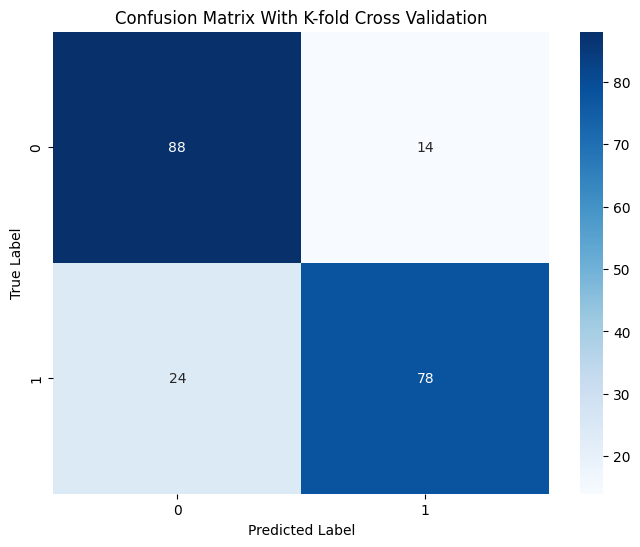

Specificity: 0.86


In [ ]:
from sklearn.model_selection import cross_val_predict

# Perform 6-fold cross-validation to get predictions for each data point
y_pre_sur = cross_val_predict(rf_model_sur, X_trans_sur, Y_trans_sur, cv=14)

# Calculate the confusion matrix
conf_matrix_sur = confusion_matrix(Y_trans_sur, y_pre_sur)
print("Confusion Matrix:\n", conf_matrix_sur)

# Additional metrics
print("\nCross-Validated Classification Report:")
print(classification_report(Y_trans_sur, y_pre_sur))

# Calculate and print overall cross-validated accuracy
accuracy_cv = accuracy_score(Y_trans_sur, y_pre_sur)
print(f"Overall Cross-Validated Accuracy: {accuracy_cv:.2f}")


# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_trans_sur, y_pre_sur)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Confusion Matrix With K-fold Cross Validation")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix_sur = confusion_matrix(Y_trans_sur, y_pre_sur)

# Extract TN, FP, FN, TP
tn, fp, fn, tp = conf_matrix_sur.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")


In [ ]:
# List of possible k values
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Store mean accuracies for each k
mean_accuracies = []

# Loop through each k value and perform cross-validation
for k in k_values:
    cv_scores = cross_val_score(rf_model_sur, X_trans_sur, Y_trans_sur, cv=k, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    mean_accuracies.append(mean_accuracy)
    print(f"Mean Accuracy for k={k}: {mean_accuracy:.4f}")

# Find the optimal k
optimal_k = k_values[np.argmax(mean_accuracies)]
print(f"Optimal k: {optimal_k}")

Mean Accuracy for k=2: 0.7157
Mean Accuracy for k=3: 0.7402
Mean Accuracy for k=4: 0.7549
Mean Accuracy for k=5: 0.7844
Mean Accuracy for k=6: 0.7549
Mean Accuracy for k=7: 0.7803
Mean Accuracy for k=8: 0.7898
Mean Accuracy for k=9: 0.7708
Mean Accuracy for k=10: 0.7948
Optimal k: 10


Mean Accuracy for k=2: 0.7157
Mean Accuracy for k=3: 0.7402
Mean Accuracy for k=4: 0.7549
Mean Accuracy for k=5: 0.7844
Mean Accuracy for k=6: 0.7549
Mean Accuracy for k=7: 0.7803
Mean Accuracy for k=8: 0.7898
Mean Accuracy for k=9: 0.7708
Mean Accuracy for k=10: 0.7948
Mean Accuracy for k=11: 0.7711
Mean Accuracy for k=12: 0.8039
Mean Accuracy for k=13: 0.8003
Mean Accuracy for k=14: 0.8153
Mean Accuracy for k=15: 0.7908
Mean Accuracy for k=16: 0.8045
Mean Accuracy for k=17: 0.7941
Mean Accuracy for k=18: 0.7946
Mean Accuracy for k=19: 0.7852
Mean Accuracy for k=20: 0.7518
Optimal k: 14


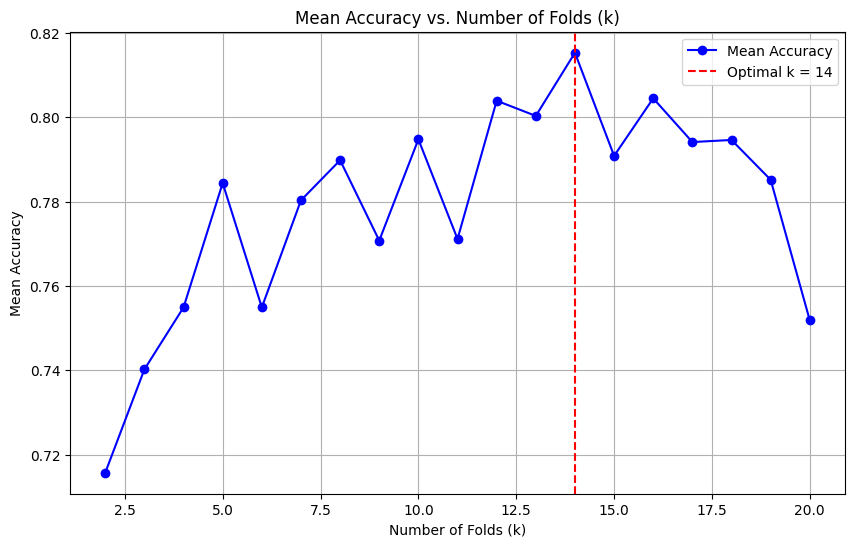

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Example values (replace with your model and data)
k_values = list(range(2, 21))  # k values from 2 to 20
mean_accuracies = []

# Loop through each k value and perform cross-validation
for k in k_values:
    cv_scores = cross_val_score(rf_model_sur, X_trans_sur, Y_trans_sur, cv=k, scoring='accuracy')
    mean_accuracy = np.mean(cv_scores)
    mean_accuracies.append(mean_accuracy)
    print(f"Mean Accuracy for k={k}: {mean_accuracy:.4f}")


# Find the optimal k
optimal_k_sur = k_values[np.argmax(mean_accuracies)]  # Use the correct list of accuracies
print(f"Optimal k: {optimal_k_sur}")



# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b', label='Mean Accuracy')
plt.axvline(x=optimal_k_sur, color='r', linestyle='--', label=f'Optimal k = {optimal_k_sur}')
plt.title('Mean Accuracy vs. Number of Folds (k)')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Usng K-Fold Cross Validation Method

from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier
rf_model_sur = RandomForestClassifier(n_estimators=100, random_state=41, max_depth= num_columns_sur)

# Perform 5-fold cross-validation
cv_scores_sur = cross_val_score(rf_model_sur, X_trans_sur, Y_trans_sur, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores_sur)
print("Mean CV Score:", np.mean(cv_scores_sur))

Cross-Validation Scores: [0.66666667 0.76190476 0.71428571 0.9047619  0.65       0.75
 0.85       0.9        0.95       0.8       ]
Mean CV Score: 0.7947619047619048
